In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns

In [3]:
customer_df=pd.read_csv("/content/customer_info.csv")
print(customer_df)

       Unnamed: 0  customer_id       customer_name customer_gender  \
0               0        39634         David Frink            male   
1               1        43460       Belinda Terry          female   
2               2        23937       Evelyn Calico          female   
3               3         2431         Ora Boggess          female   
4               4        10090       Lonnie Hopson            male   
...           ...          ...                 ...             ...   
43626       43626        48487     Amelia Crawford          female   
43627       43627        24856        Silvia Ramos          female   
43628       43628        21373       Addie Coronel          female   
43629       43629        19527      Msc. Mary Ross          female   
43630       43630         5120  Bsc. Milton Friend            male   

        customer_birthdate  kids_home  teens_home  number_complaints  \
0      05/15/1964 10:34 PM        1.0         1.0                1.0   
1      03/26/19

In [4]:
data=customer_df.copy()
print(data)

       Unnamed: 0  customer_id       customer_name customer_gender  \
0               0        39634         David Frink            male   
1               1        43460       Belinda Terry          female   
2               2        23937       Evelyn Calico          female   
3               3         2431         Ora Boggess          female   
4               4        10090       Lonnie Hopson            male   
...           ...          ...                 ...             ...   
43626       43626        48487     Amelia Crawford          female   
43627       43627        24856        Silvia Ramos          female   
43628       43628        21373       Addie Coronel          female   
43629       43629        19527      Msc. Mary Ross          female   
43630       43630         5120  Bsc. Milton Friend            male   

        customer_birthdate  kids_home  teens_home  number_complaints  \
0      05/15/1964 10:34 PM        1.0         1.0                1.0   
1      03/26/19

In [5]:
data.drop(columns=["Unnamed: 0","customer_name"],inplace=True)

In [6]:
data["customer_gender"]=data["customer_gender"].apply(lambda x: 1 if x == "male" else 0)
print(data)

       customer_id  customer_gender   customer_birthdate  kids_home  \
0            39634                1  05/15/1964 10:34 PM        1.0   
1            43460                0  03/26/1988 11:06 PM        1.0   
2            23937                0  04/13/1969 06:07 PM        0.0   
3             2431                0  06/15/1941 03:26 AM        0.0   
4            10090                1  12/18/2001 03:03 AM        0.0   
...            ...              ...                  ...        ...   
43626        48487                0  08/28/1983 11:43 AM        1.0   
43627        24856                0  09/21/1992 07:16 PM        1.0   
43628        21373                0  02/20/1994 05:58 AM        0.0   
43629        19527                0  08/06/1989 04:39 PM        1.0   
43630         5120                1  06/19/1957 10:53 AM        2.0   

       teens_home  number_complaints  distinct_stores_visited  \
0             1.0                1.0                      2.0   
1             0.0

In [7]:
data["customer_birthdate"]=pd.to_datetime(data["customer_birthdate"])

<ipython-input-7-0054a82ff882>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["customer_birthdate"]=pd.to_datetime(data["customer_birthdate"])


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43631 entries, 0 to 43630
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   customer_id                              43631 non-null  int64         
 1   customer_gender                          43631 non-null  int64         
 2   customer_birthdate                       43631 non-null  datetime64[ns]
 3   kids_home                                43107 non-null  float64       
 4   teens_home                               42610 non-null  float64       
 5   number_complaints                        42977 non-null  float64       
 6   distinct_stores_visited                  42322 non-null  float64       
 7   lifetime_spend_groceries                 43631 non-null  float64       
 8   lifetime_spend_electronics               43631 non-null  float64       
 9   typical_hour                           

In [9]:
today=datetime.today()

In [10]:
data["age"]=today.year-data["customer_birthdate"].dt.year
print(data)

       customer_id  customer_gender  customer_birthdate  kids_home  \
0            39634                1 1964-05-15 22:34:00        1.0   
1            43460                0 1988-03-26 23:06:00        1.0   
2            23937                0 1969-04-13 18:07:00        0.0   
3             2431                0 1941-06-15 03:26:00        0.0   
4            10090                1 2001-12-18 03:03:00        0.0   
...            ...              ...                 ...        ...   
43626        48487                0 1983-08-28 11:43:00        1.0   
43627        24856                0 1992-09-21 19:16:00        1.0   
43628        21373                0 1994-02-20 05:58:00        0.0   
43629        19527                0 1989-08-06 16:39:00        1.0   
43630         5120                1 1957-06-19 10:53:00        2.0   

       teens_home  number_complaints  distinct_stores_visited  \
0             1.0                1.0                      2.0   
1             0.0            

In [11]:
print(data["loyalty_card_number"].isnull().sum()/len(data["loyalty_card_number"]))

0.4349430450826247


In [12]:
data["loyalty_card_number"]

0             NaN
1             NaN
2        951127.0
3        958680.0
4        977059.0
           ...   
43626         NaN
43627    909859.0
43628         NaN
43629    933102.0
43630    916045.0
Name: loyalty_card_number, Length: 43631, dtype: float64

In [13]:
data["loyalty_card_number"]=np.where(data["loyalty_card_number"].isnull(), 0, 1)

In [14]:
data["loyalty_card_number"]

0        0
1        0
2        1
3        1
4        1
        ..
43626    0
43627    1
43628    0
43629    1
43630    1
Name: loyalty_card_number, Length: 43631, dtype: int64

In [15]:
import geopandas as gpd
from shapely.geometry import Point

In [16]:
data["geometry"] = data.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis=1)

In [17]:
gdf = gpd.GeoDataFrame(data, geometry="geometry")

In [18]:
print(gdf)

       customer_id  customer_gender  customer_birthdate  kids_home  \
0            39634                1 1964-05-15 22:34:00        1.0   
1            43460                0 1988-03-26 23:06:00        1.0   
2            23937                0 1969-04-13 18:07:00        0.0   
3             2431                0 1941-06-15 03:26:00        0.0   
4            10090                1 2001-12-18 03:03:00        0.0   
...            ...              ...                 ...        ...   
43626        48487                0 1983-08-28 11:43:00        1.0   
43627        24856                0 1992-09-21 19:16:00        1.0   
43628        21373                0 1994-02-20 05:58:00        0.0   
43629        19527                0 1989-08-06 16:39:00        1.0   
43630         5120                1 1957-06-19 10:53:00        2.0   

       teens_home  number_complaints  distinct_stores_visited  \
0             1.0                1.0                      2.0   
1             0.0            

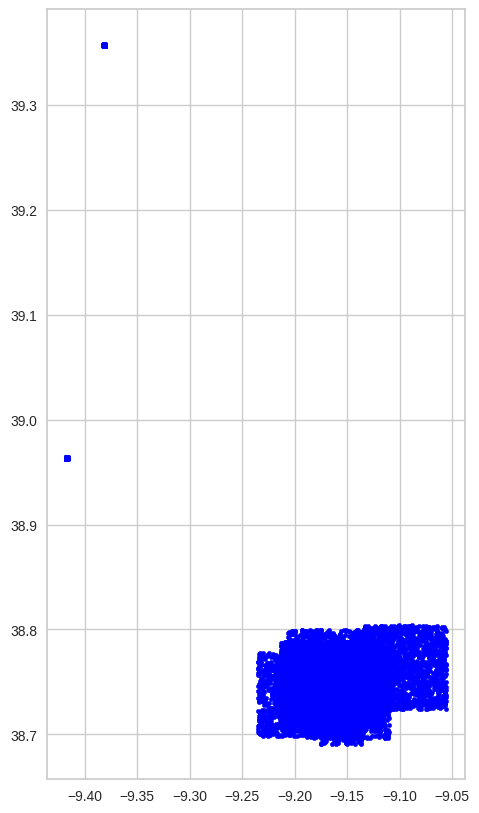

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', markersize=10)
plt.show()

In [20]:
data.drop(columns=["geometry"],inplace=True)

In [21]:
data["year_first_transaction"].isnull().sum()

0

In [22]:
data["customer_relationship_year"]=today.year-data["year_first_transaction"]


In [23]:
data["customer_relationship_year"]

0        14.0
1        10.0
2        15.0
3        17.0
4         0.0
         ... 
43626     8.0
43627    10.0
43628     7.0
43629    17.0
43630    22.0
Name: customer_relationship_year, Length: 43631, dtype: float64

In [24]:
data.drop(columns=["year_first_transaction"],inplace=True)

In [25]:
data["number_complaints"].info()
data["number_complaints"].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 43631 entries, 0 to 43630
Series name: number_complaints
Non-Null Count  Dtype  
--------------  -----  
42977 non-null  float64
dtypes: float64(1)
memory usage: 341.0 KB


count    42977.000000
mean         0.705726
std          0.624624
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: number_complaints, dtype: float64

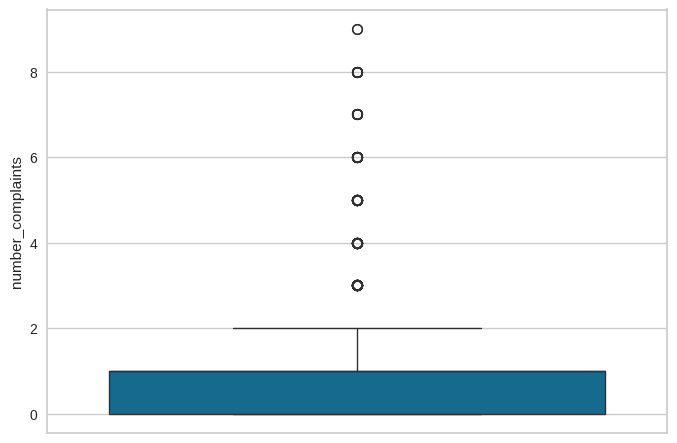

In [26]:
sns.boxplot(data["number_complaints"])
plt.show()

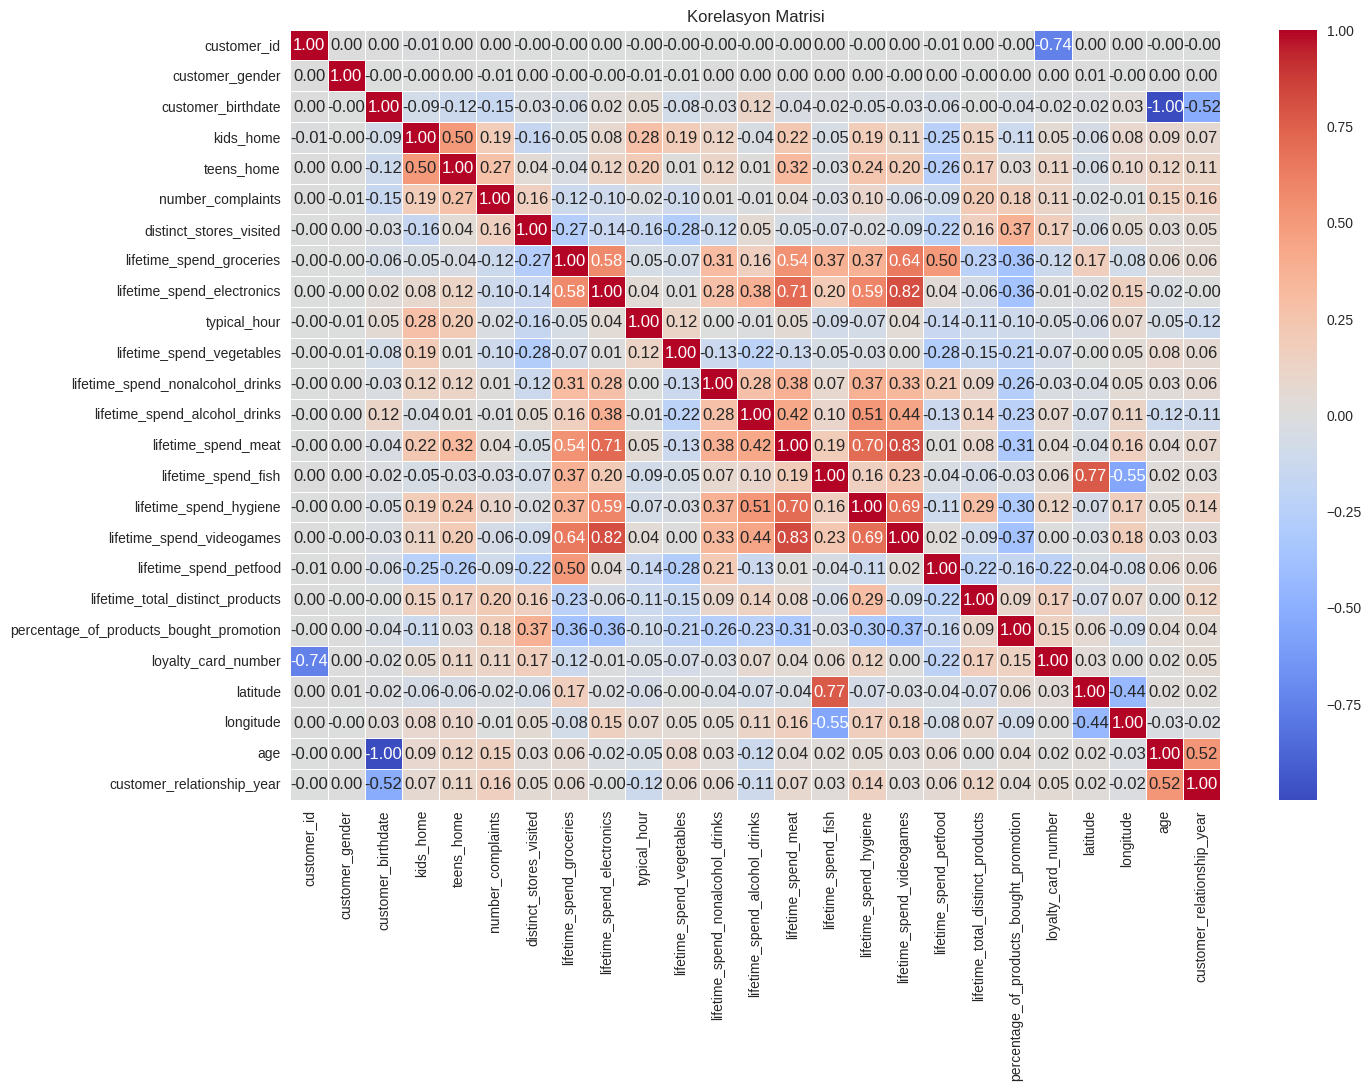

In [27]:
korelasyon_matrisi = data.corr()


plt.figure(figsize=(15, 10))
sns.heatmap(korelasyon_matrisi, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

In [28]:
data.isnull().sum()


customer_id                                   0
customer_gender                               0
customer_birthdate                            0
kids_home                                   524
teens_home                                 1021
number_complaints                           654
distinct_stores_visited                    1309
lifetime_spend_groceries                      0
lifetime_spend_electronics                    0
typical_hour                               1745
lifetime_spend_vegetables                   873
lifetime_spend_nonalcohol_drinks              0
lifetime_spend_alcohol_drinks                 0
lifetime_spend_meat                           0
lifetime_spend_fish                        1309
lifetime_spend_hygiene                        0
lifetime_spend_videogames                     0
lifetime_spend_petfood                        0
lifetime_total_distinct_products              0
percentage_of_products_bought_promotion       0
loyalty_card_number                     

In [29]:
data["number_complaints"].isnull().sum()

654

In [30]:
data["number_complaints"].value_counts()

number_complaints
1.0    24908
0.0    15591
2.0     2277
3.0       75
4.0       51
5.0       40
6.0       18
8.0        8
7.0        7
9.0        2
Name: count, dtype: int64

In [31]:
data.rename(columns={
    "loyalty_card_number":"loyalyt_card_have"},inplace=True)

## LISBOA CITY CENTER

In [32]:
ref_lat = 38.736946
ref_lon = -9.142685

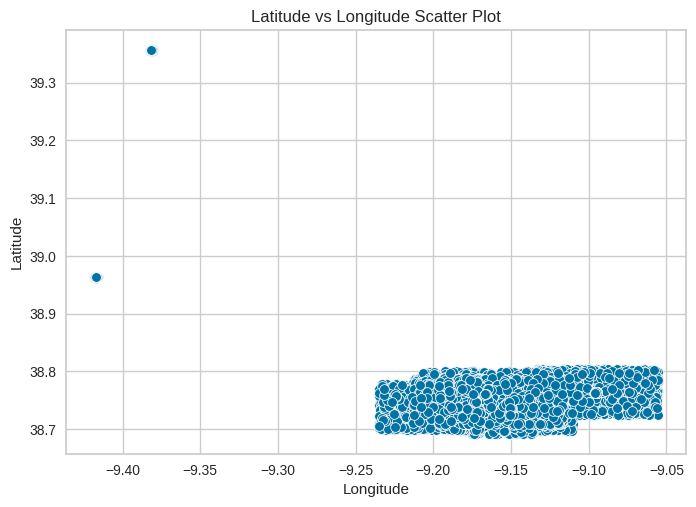

In [33]:
sns.scatterplot(data=data,x="longitude",y="latitude")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude Scatter Plot')
plt.show()

In [34]:
!pip install cartopy

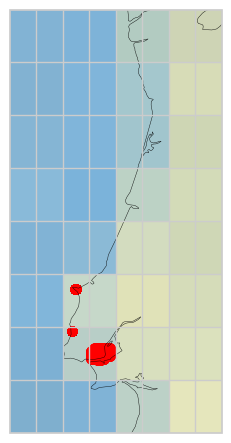

In [35]:
import cartopy.crs as ccrs
import cartopy.crs as ccrs
import cartopy.feature as cfeature
ax = plt.axes(projection=ccrs.PlateCarree())

# Add the satellite image as the background of the map
ax.stock_img()
# Set the map extent to the area of interest
ax.add_feature(cfeature.BORDERS)

# Add coastline
ax.coastlines()

# Add the map of Portugal
extent = [-10, -8, 38, 42]  # [min_longitude, max_longitude, min_latitude, max_latitude]
ax.set_extent(extent)

# Add gridlines
ax.gridlines()

# Plot the scatters on the map
plt.scatter(
    data.longitude,
    data.latitude,
    transform=ccrs.PlateCarree(), color='red', marker='o'
    )

In [36]:
import math

In [37]:
ref_lat = 38.736946
ref_lon = -9.142685

mesafeler=[]

for index,row in data.iterrows():
  mesafe=np.sqrt((row["latitude"] - ref_lat)**2 + (row["longitude"] - ref_lon)**2)
  mesafeler.append(mesafe)

In [38]:
len(mesafeler)
mesafeler=pd.DataFrame(mesafeler)

In [39]:
print(mesafeler)

              0
0      0.006519
1      0.031490
2      0.029723
3      0.045863
4      0.047939
...         ...
43626  0.033382
43627  0.033444
43628  0.050970
43629  0.039948
43630  0.035649

[43631 rows x 1 columns]


In [40]:
data["distance_center"]=mesafeler



# **Approach to Null Values**

In [41]:
data.isnull().sum()


customer_id                                   0
customer_gender                               0
customer_birthdate                            0
kids_home                                   524
teens_home                                 1021
number_complaints                           654
distinct_stores_visited                    1309
lifetime_spend_groceries                      0
lifetime_spend_electronics                    0
typical_hour                               1745
lifetime_spend_vegetables                   873
lifetime_spend_nonalcohol_drinks              0
lifetime_spend_alcohol_drinks                 0
lifetime_spend_meat                           0
lifetime_spend_fish                        1309
lifetime_spend_hygiene                        0
lifetime_spend_videogames                     0
lifetime_spend_petfood                        0
lifetime_total_distinct_products              0
percentage_of_products_bought_promotion       0
loyalyt_card_have                       

In [42]:
c_basket=pd.read_csv("/content/customer_basket.csv")

In [43]:
print(c_basket.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89952 entries, 0 to 89951
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   invoice_id     89952 non-null  int64 
 1   list_of_goods  89952 non-null  object
 2   customer_id    89952 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ MB
None


In [44]:
c_basket

invoice_id                                      list_of_goods  \
0         7448187  ['olive oil', 'yogurt cake', 'grated cheese', ...   
1         3167314  ['babies food', 'shower gel', 'rice', 'black b...   
2        10199712  ['babies food', 'barbecue sauce', 'olive oil',...   
3        12179179  ['babies food', 'milk', 'rice', 'yogurt cake',...   
4         8292388  ['napkins', 'cookies', 'razor', 'cooking oil',...   
...           ...                                                ...   
89947    10920856  ['rice', 'pet food', 'cauliflower', 'cake', 'c...   
89948    10239983  ['cotton buds', 'cream', 'gums', 'cooking oil'...   
89949    10238942  ['cottage cheese', 'champagne', 'spaghetti', '...   
89950     6593522  ['chutney', 'samsung galaxy 10', 'catfish', 't...   
89951     8150061  ['cotton buds', 'phone car charger', 'cooking ...   

       customer_id  
0            43134  
1            43134  
2            43134  
3            43134  
4            43134  
...            ...  
89947        31335  
89948        35452  
89949         3608  
89950        33063  
89951        30047  

[89952 rows x 3 columns]

In [45]:
fish=["salmon","shrimp","fresh tuna","canned_tuna","seabass","catfish","trout"]

In [46]:
filtered_rows = []
for index, row in c_basket.iterrows():
    contains_excluded = False
    for value in fish:
        if value in row['list_of_goods']:
            contains_excluded = True
            break
    if not contains_excluded:
        filtered_rows.append(index)

# Sonuçları filtreleyin
filtered_df = c_basket.iloc[filtered_rows]

In [47]:
filtered_df

invoice_id                                      list_of_goods  \
0         7448187  ['olive oil', 'yogurt cake', 'grated cheese', ...   
3        12179179  ['babies food', 'milk', 'rice', 'yogurt cake',...   
4         8292388  ['napkins', 'cookies', 'razor', 'cooking oil',...   
5        11607908  ['green beans', 'toilet paper', 'yogurt cake',...   
6         1888809  ['melons', 'pickles', 'tomatoes', 'ratchet & c...   
...           ...                                                ...   
89945     3649658  ['white wine', 'pet food', 'tomato sauce', 'br...   
89946    11951767  ['milk', 'megaman zero 4', 'olive oil', 'cream...   
89948    10239983  ['cotton buds', 'cream', 'gums', 'cooking oil'...   
89949    10238942  ['cottage cheese', 'champagne', 'spaghetti', '...   
89951     8150061  ['cotton buds', 'phone car charger', 'cooking ...   

       customer_id  
0            43134  
3            43134  
4            43134  
5            43134  
6             5422  
...            ...  
89945        29709  
89946        33179  
89948        35452  
89949         3608  
89951        30047  

[74575 rows x 3 columns]

In [48]:
empty_rows = data[data['lifetime_spend_fish'].isna()]

selected_columns = empty_rows[['customer_id', 'lifetime_spend_fish']]

print(selected_columns)

       customer_id  lifetime_spend_fish
14           15019                  NaN
102           1117                  NaN
105          34592                  NaN
144          39168                  NaN
168          27379                  NaN
...            ...                  ...
43423        12903                  NaN
43521        49205                  NaN
43536         5229                  NaN
43577         9653                  NaN
43587         9699                  NaN

[1309 rows x 2 columns]


In [49]:
grouped_df = filtered_df.groupby('customer_id').size().reset_index(name='observation_count')

print(grouped_df)

       customer_id  observation_count
0                1                  2
1                2                  2
2                3                  3
3                5                  1
4                6                  5
...            ...                ...
26634        43621                  5
26635        43626                  1
26636        43628                  1
26637        43630                  1
26638        43631                  3

[26639 rows x 2 columns]


In [50]:
filtered_df[filtered_df["customer_id"]==1]

invoice_id                                      list_of_goods  \
61951     6532590  ['barbecue sauce', 'melons', 'black tea', 'tom...   
61952     1989939  ['shower gel', 'asparagus', 'pickles', 'gums',...   

       customer_id  
61951            1  
61952            1

In [51]:
c_basket[c_basket["customer_id"]==27379]

invoice_id                                      list_of_goods  \
73040     5764952  ['ground beef', 'strong cheese', 'olive oil', ...   
73041     9728849  ['parmesan cheese', 'cream', 'cottage cheese',...   
73042      722295  ['milk', 'babies food', 'rice', 'tooth brush',...   
73043     5267292  ['black tea', 'gums', 'pet food', 'flax seed',...   

       customer_id  
73040        27379  
73041        27379  
73042        27379  
73043        27379

In [52]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

In [53]:
fishb=data[data["lifetime_spend_fish"].isnull()]
print(fishb)

       customer_id  customer_gender  customer_birthdate  kids_home  \
14           15019                0 1963-03-28 15:37:00        1.0   
102           1117                1 1943-05-27 23:39:00        1.0   
105          34592                1 1951-02-03 23:25:00        1.0   
144          39168                0 1943-12-20 07:07:00        0.0   
168          27379                0 1992-08-01 10:26:00        0.0   
...            ...              ...                 ...        ...   
43423        12903                0 1967-12-25 00:57:00        1.0   
43521        49205                0 1981-08-14 16:55:00        1.0   
43536         5229                1 1976-12-24 17:44:00        1.0   
43577         9653                1 1984-06-07 04:08:00        2.0   
43587         9699                0 1992-05-03 14:28:00        0.0   

       teens_home  number_complaints  distinct_stores_visited  \
14            0.0                0.0                      3.0   
102           3.0            

In [54]:
data["lifetime_spend_fish"].describe()

count    42322.000000
mean      1471.423846
std       3910.163766
min          0.000000
25%        187.000000
50%        641.000000
75%       1570.000000
max      50381.000000
Name: lifetime_spend_fish, dtype: float64

In [55]:
!pip install missingno

In [56]:
import missingno as msno

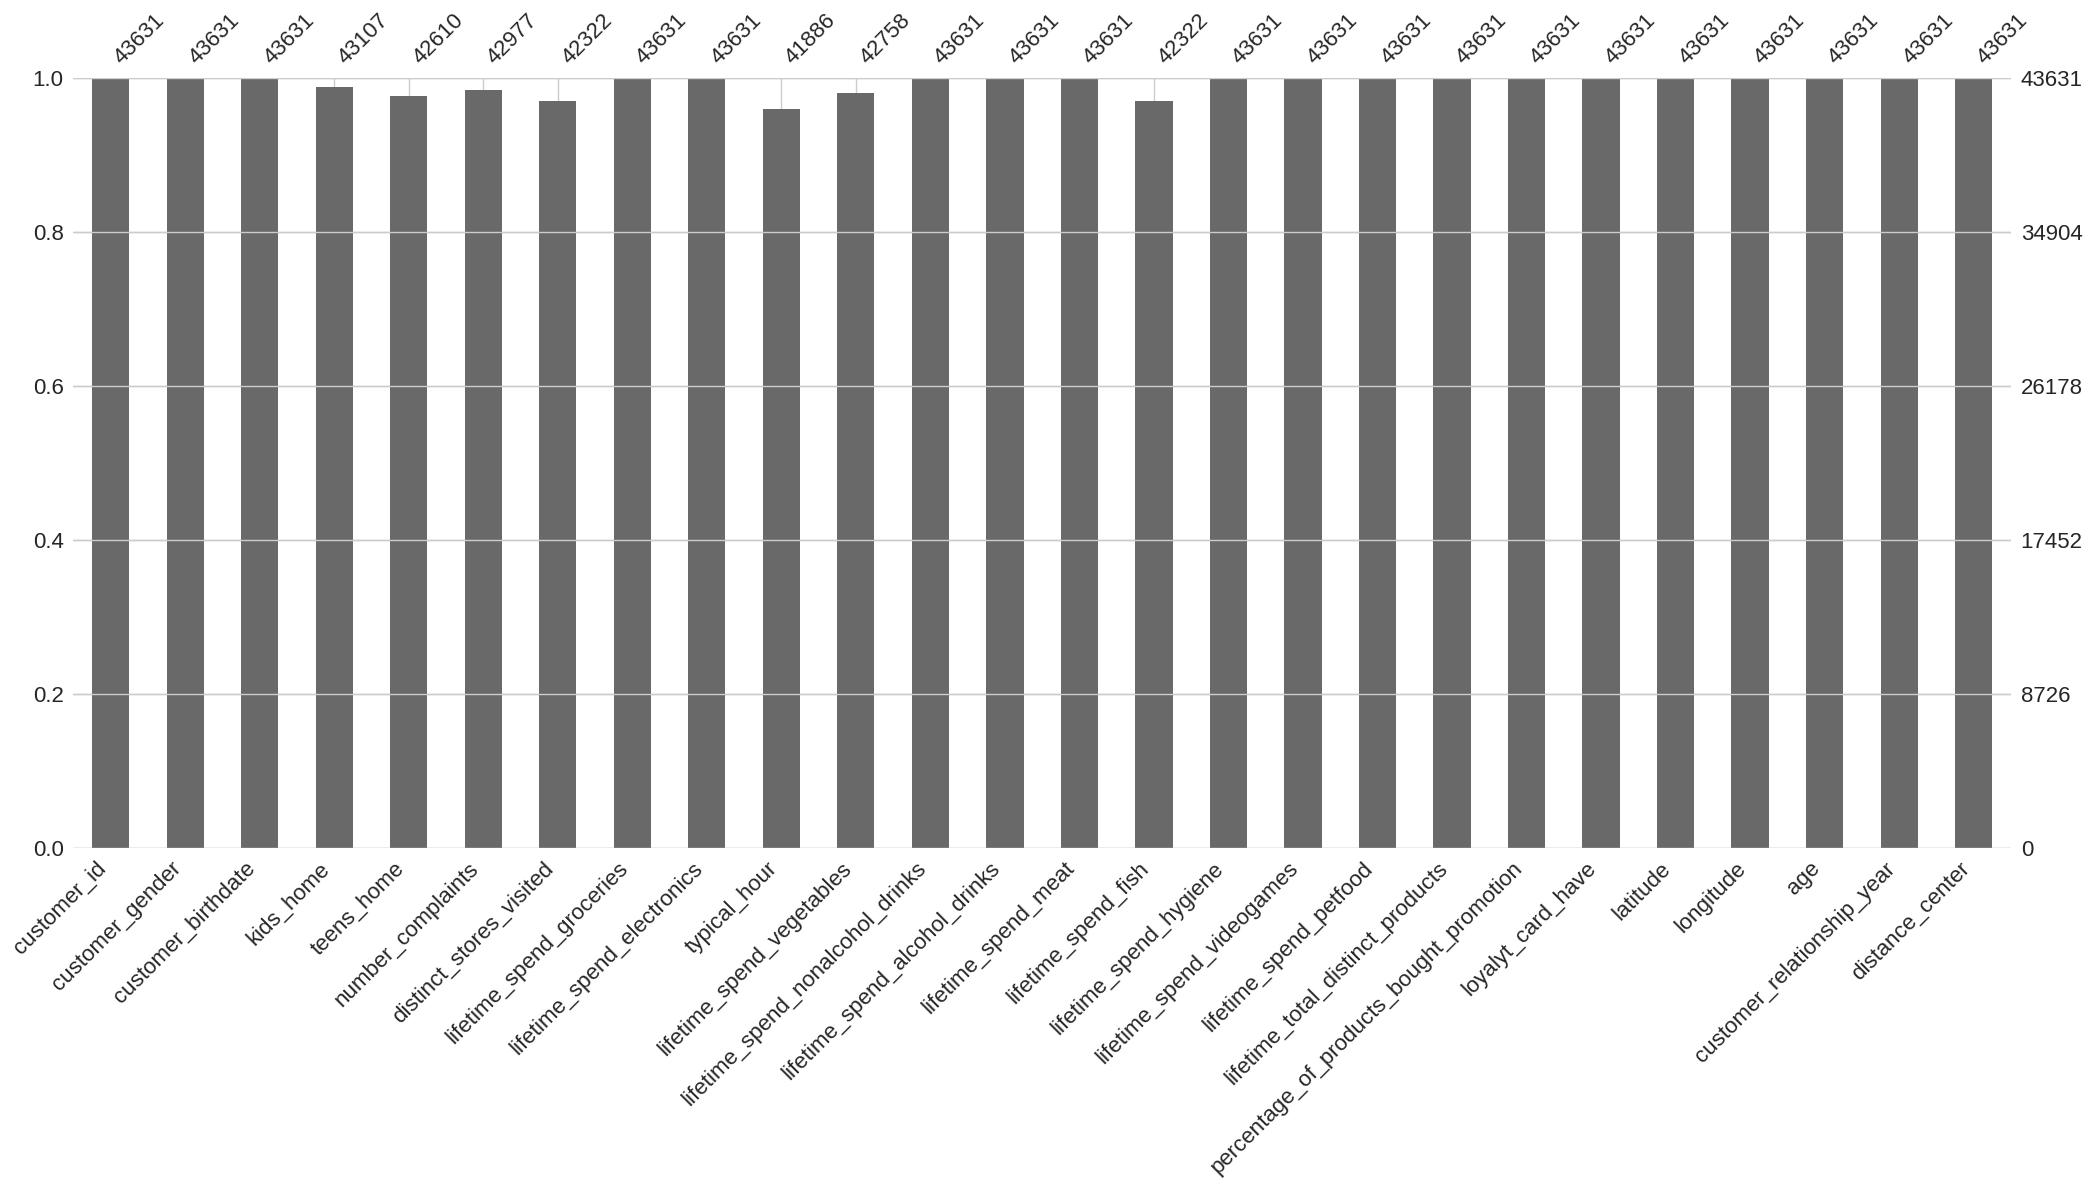

In [57]:
msno.bar(data)
plt.show()

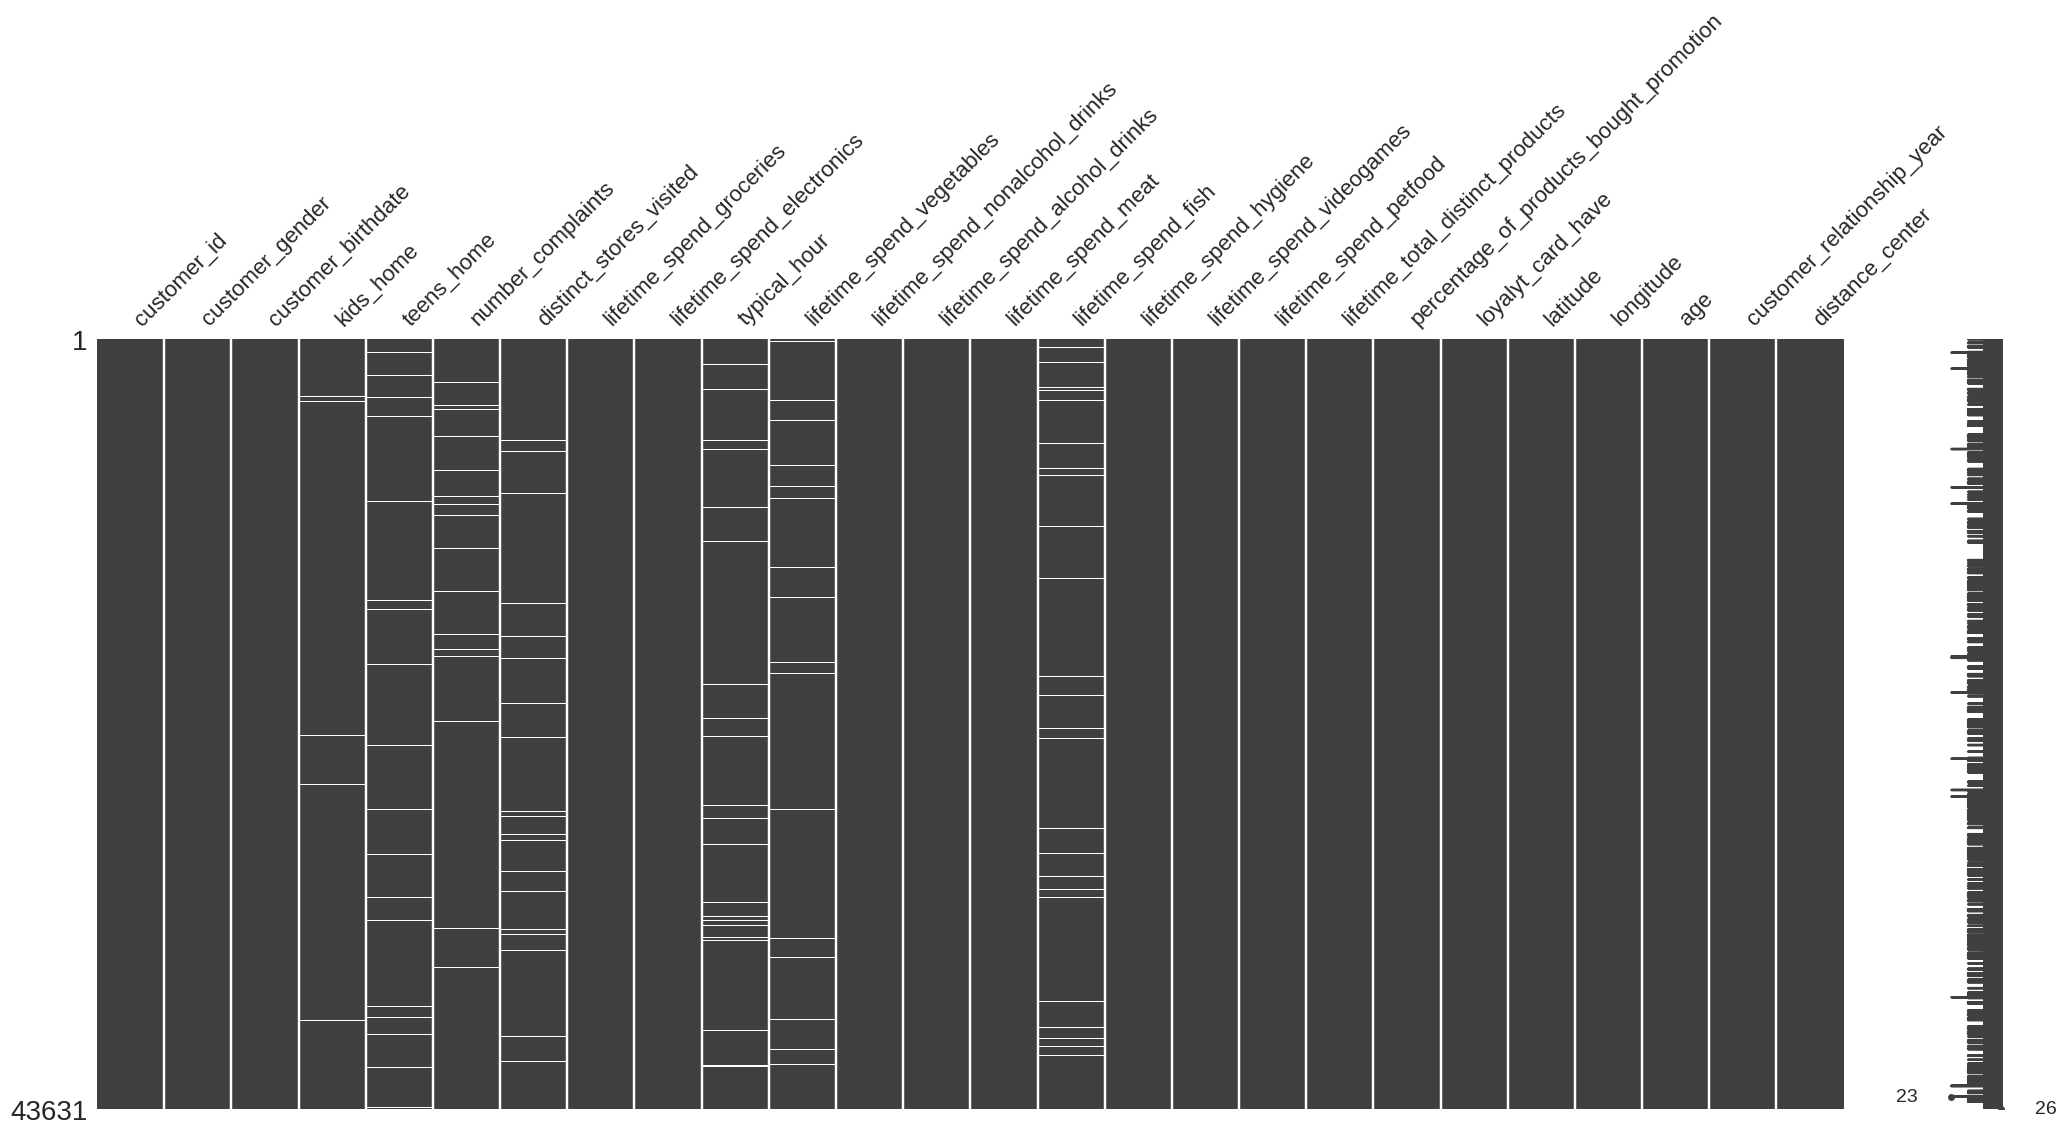

In [58]:
msno.matrix(data)
plt.show()

In [59]:
datc=data.copy()

In [60]:
dat2=datc.notnull().astype("int")
print(dat2.corr())

                            customer_id  customer_gender  customer_birthdate  \
customer_id                         NaN              NaN                 NaN   
customer_gender                     NaN              NaN                 NaN   
customer_birthdate                  NaN              NaN                 NaN   
kids_home                           NaN              NaN                 NaN   
teens_home                          NaN              NaN                 NaN   
...                                 ...              ...                 ...   
latitude                            NaN              NaN                 NaN   
longitude                           NaN              NaN                 NaN   
age                                 NaN              NaN                 NaN   
customer_relationship_year          NaN              NaN                 NaN   
distance_center                     NaN              NaN                 NaN   

                            kids_home  

In [61]:
datn = datc[["kids_home", "teens_home", "number_complaints", "distinct_stores_visited", "typical_hour", "lifetime_spend_vegetables", "lifetime_spend_fish"]]
datn

kids_home  teens_home  number_complaints  distinct_stores_visited  \
0            1.0         1.0                1.0                      2.0   
1            1.0         0.0                1.0                      2.0   
2            0.0         1.0                1.0                      3.0   
3            0.0         0.0                0.0                      1.0   
4            0.0         0.0                0.0                      1.0   
...          ...         ...                ...                      ...   
43626        1.0         1.0                0.0                      1.0   
43627        1.0         1.0                1.0                      1.0   
43628        0.0         0.0                0.0                      1.0   
43629        1.0         0.0                1.0                      1.0   
43630        2.0         0.0                2.0                      1.0   

       typical_hour  lifetime_spend_vegetables  lifetime_spend_fish  
0              17.0                      484.0               4056.0  
1               8.0                      344.0               1925.0  
2              10.0                      301.0               2347.0  
3              17.0                      153.0                151.0  
4               NaN                        8.0                172.0  
...             ...                        ...                  ...  
43626          17.0                      678.0               3779.0  
43627          12.0                      602.0               3893.0  
43628          12.0                      289.0                142.0  
43629           6.0                      866.0                  0.0  
43630          10.0                      268.0               1221.0  

[43631 rows x 7 columns]

In [62]:
datn2=datn.notnull().astype("int")
datn2.corr()

kids_home  teens_home  number_complaints  \
kids_home                   1.000000   -0.003148          -0.001480   
teens_home                 -0.003148    1.000000           0.002116   
number_complaints          -0.001480    0.002116           1.000000   
distinct_stores_visited    -0.002122   -0.005894          -0.005109   
typical_hour               -0.001028   -0.007609          -0.000151   
lifetime_spend_vegetables   0.003780   -0.002630           0.005273   
lifetime_spend_fish        -0.003356   -0.006783           0.002630   

                           distinct_stores_visited  typical_hour  \
kids_home                                -0.002122     -0.001028   
teens_home                               -0.005894     -0.007609   
number_complaints                        -0.005109     -0.000151   
distinct_stores_visited                   1.000000      0.002501   
typical_hour                              0.002501      1.000000   
lifetime_spend_vegetables                -0.002103     -0.005776   
lifetime_spend_fish                       0.003724     -0.002299   

                           lifetime_spend_vegetables  lifetime_spend_fish  
kids_home                                   0.003780            -0.003356  
teens_home                                 -0.002630            -0.006783  
number_complaints                           0.005273             0.002630  
distinct_stores_visited                    -0.002103             0.003724  
typical_hour                               -0.005776            -0.002299  
lifetime_spend_vegetables                   1.000000            -0.004981  
lifetime_spend_fish                        -0.004981             1.000000

In [63]:
data["teens_home"].describe()

count    42610.000000
mean         0.847829
std          0.840397
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: teens_home, dtype: float64

In [64]:
data[["kids_home", "teens_home", "number_complaints", "distinct_stores_visited", "typical_hour", "lifetime_spend_vegetables", "lifetime_spend_fish"]].describe()


kids_home    teens_home  number_complaints  distinct_stores_visited  \
count  43107.000000  42610.000000       42977.000000             42322.000000   
mean       1.081263      0.847829           0.705726                 1.669959   
std        1.239257      0.840397           0.624624                 1.034825   
min        0.000000      0.000000           0.000000                 1.000000   
25%        0.000000      0.000000           0.000000                 1.000000   
50%        1.000000      1.000000           1.000000                 1.000000   
75%        1.000000      1.000000           1.000000                 2.000000   
max        9.000000      6.000000           9.000000                 8.000000   

       typical_hour  lifetime_spend_vegetables  lifetime_spend_fish  
count  41886.000000               42758.000000         42322.000000  
mean      13.520580                 456.893938          1471.423846  
std        4.558057                 312.832282          3910.163766  
min        6.000000                   0.000000             0.000000  
25%       10.000000                 227.000000           187.000000  
50%       13.000000                 387.000000           641.000000  
75%       17.000000                 584.000000          1570.000000  
max       24.000000                2112.000000         50381.000000

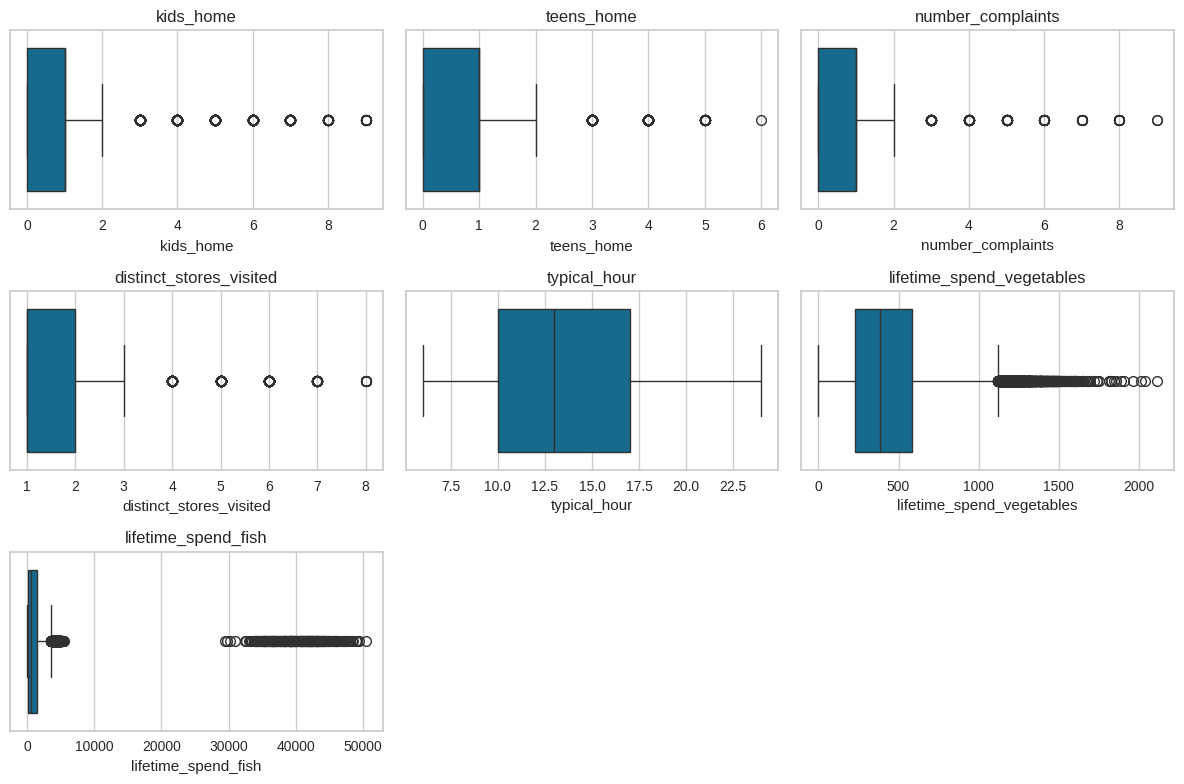

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ["kids_home", "teens_home", "number_complaints", "distinct_stores_visited", "typical_hour", "lifetime_spend_vegetables", "lifetime_spend_fish"]

# Tek bir figure oluştur
plt.figure(figsize=(12, 8))

# Her bir sütun için subplot oluşturarak kutu grafiği oluştur
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # 3x3'lük bir alt grafik düzeni, her sütun bir subplot olacak
    sns.boxplot(x=data[column])  # Belirtilen sütun için kutu grafiği oluştur
    plt.title(column)  # Grafiğin başlığını belirtilen sütun adı yap

plt.tight_layout()  # Grafikler arasındaki boşlukları ayarla
plt.show()  # Tüm grafikleri göster


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

data5 = data.copy()

In [67]:
df_train = data5[data5['lifetime_spend_fish'].notna()]
df_predict = data5[data5['lifetime_spend_fish'].isna()]

# Özellikler ve hedef değişkeni belirleme
X_train = df_train[['distance_center', 'lifetime_spend_groceries']]
y_train = df_train['lifetime_spend_fish']

X_predict = df_predict[['distance_center', 'lifetime_spend_groceries']]

# Modeli oluşturma ve eğitme
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Tahmin yapma
predictions = model.predict(X_predict)

# Tahmin edilen değerleri orijinal veri çerçevesine yerleştirme
data5.loc[data5['lifetime_spend_fish'].isna(), 'lifetime_spend_fish'] = predictions



In [68]:
data5["kids_home"].fillna(value=data5["kids_home"].mean(), inplace=True)

In [69]:
data5["number_complaints"].fillna(value=data5["number_complaints"].mean(), inplace=True)

In [70]:
data5["lifetime_spend_vegetables"].fillna(value=data5["lifetime_spend_vegetables"].mean(), inplace=True)

In [71]:
data5["lifetime_spend_vegetables"].describe()

count    43631.000000
mean       456.893938
std        309.686710
min          0.000000
25%        230.500000
50%        395.000000
75%        578.000000
max       2112.000000
Name: lifetime_spend_vegetables, dtype: float64

In [72]:
df_traind = data5[data5['distinct_stores_visited'].notna()]
df_predictd = data5[data5['distinct_stores_visited'].isna()]

# Özellikler ve hedef değişkeni belirleme
X_traind = df_traind[["lifetime_spend_petfood","percentage_of_products_bought_promotion","lifetime_spend_vegetables","lifetime_spend_groceries"]]
y_traind = df_traind['distinct_stores_visited']

X_predictd = df_predictd[["lifetime_spend_petfood","percentage_of_products_bought_promotion","lifetime_spend_vegetables","lifetime_spend_groceries"]]

# Modeli oluşturma ve eğitme
modeld = RandomForestRegressor()
modeld.fit(X_traind, y_traind)

# Tahmin yapma
predictionsd = modeld.predict(X_predictd)

# Tahmin edilen değerleri orijinal veri çerçevesine yerleştirme
data5.loc[data5['distinct_stores_visited'].isna(), 'distinct_stores_visited'] = predictionsd




In [73]:
data5["typical_hour"].fillna(value=data5["typical_hour"].mean(), inplace=True)

In [74]:
df_traint = data5[data5['teens_home'].notna()]
df_predict = data5[data5['teens_home'].isna()]

# Özellikler ve hedef değişkeni belirleme
X_traint = df_traint[["typical_hour",'kids_home',"lifetime_spend_petfood","lifetime_spend_meat","number_complaints"]]
y_traint = df_traint['teens_home']

X_predictt = df_predict[["typical_hour",'kids_home',"lifetime_spend_petfood","lifetime_spend_meat","number_complaints"]]

# Modeli oluşturma ve eğitme
modelt = RandomForestRegressor()
modelt.fit(X_traint, y_traint)

# Tahmin yapma
predictionst = modelt.predict(X_predictt)

# Tahmin edilen değerleri orijinal veri çerçevesine yerleştirme
data5.loc[data5['teens_home'].isna(), 'teens_home'] = predictionst




In [75]:
pd.set_option('display.max_rows', None)
data5.isnull().sum()

customer_id                                0
customer_gender                            0
customer_birthdate                         0
kids_home                                  0
teens_home                                 0
number_complaints                          0
distinct_stores_visited                    0
lifetime_spend_groceries                   0
lifetime_spend_electronics                 0
typical_hour                               0
lifetime_spend_vegetables                  0
lifetime_spend_nonalcohol_drinks           0
lifetime_spend_alcohol_drinks              0
lifetime_spend_meat                        0
lifetime_spend_fish                        0
lifetime_spend_hygiene                     0
lifetime_spend_videogames                  0
lifetime_spend_petfood                     0
lifetime_total_distinct_products           0
percentage_of_products_bought_promotion    0
loyalyt_card_have                          0
latitude                                   0
longitude 

In [76]:
data_d=data5.copy()

In [77]:
data_d.drop(columns=["customer_id","latitude","longitude","customer_birthdate"],inplace=True)

In [78]:
print(data_d["typical_hour"].describe())

count    43631.000000
mean        13.520580
std          4.465976
min          6.000000
25%         10.000000
50%         13.000000
75%         17.000000
max         24.000000
Name: typical_hour, dtype: float64


<ipython-input-79-192e721ebf17>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


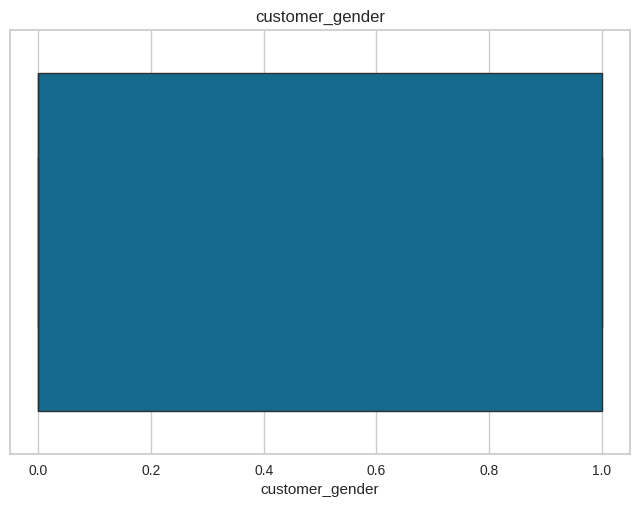

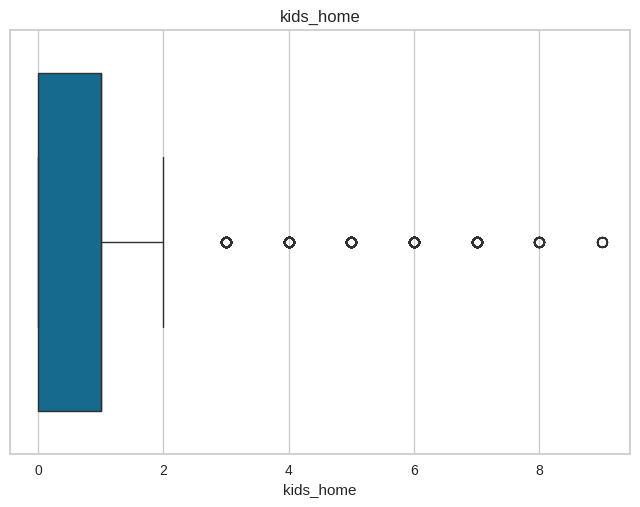

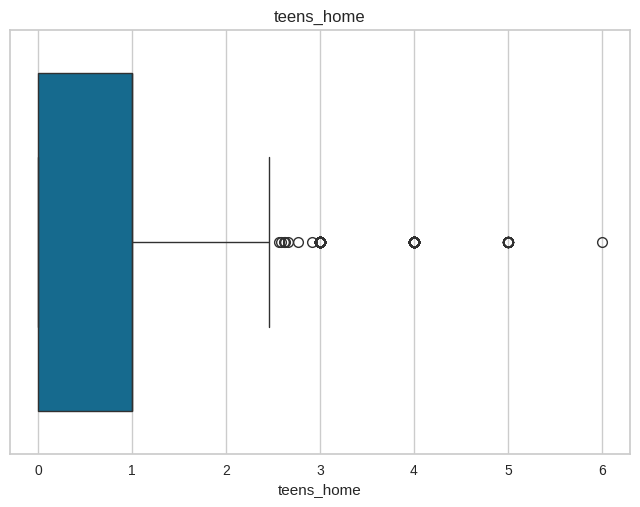

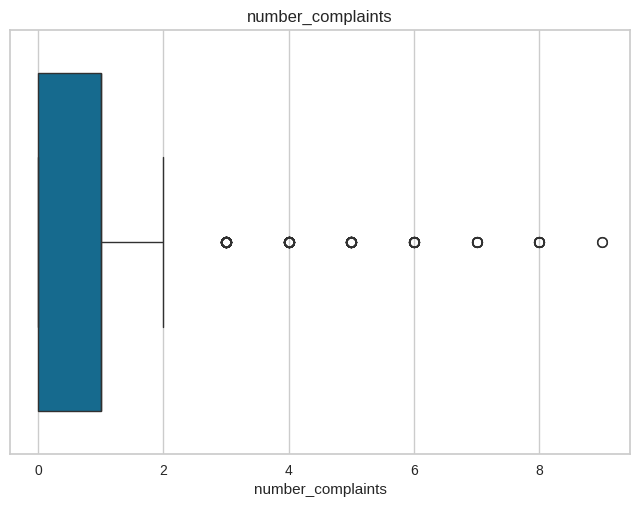

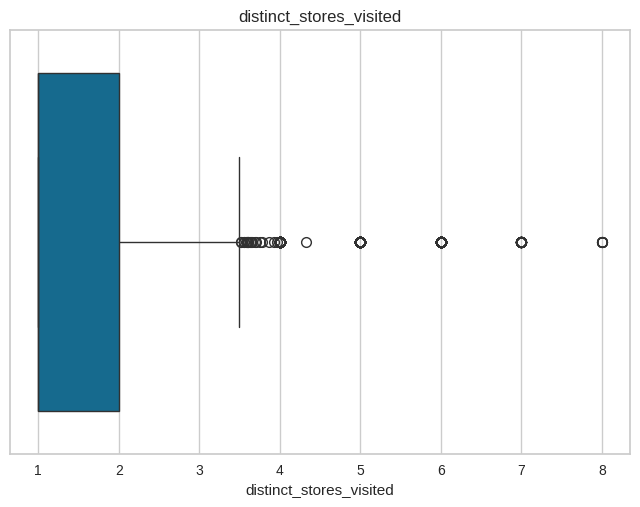

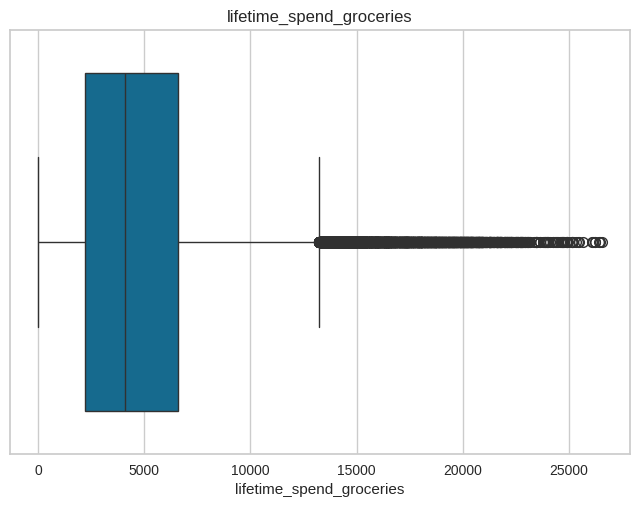

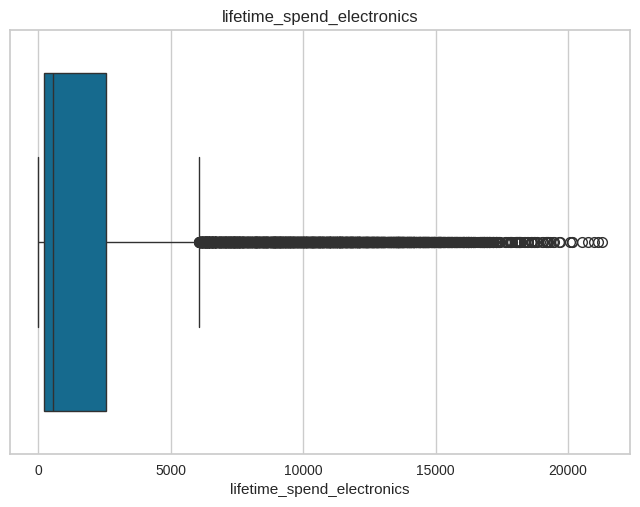

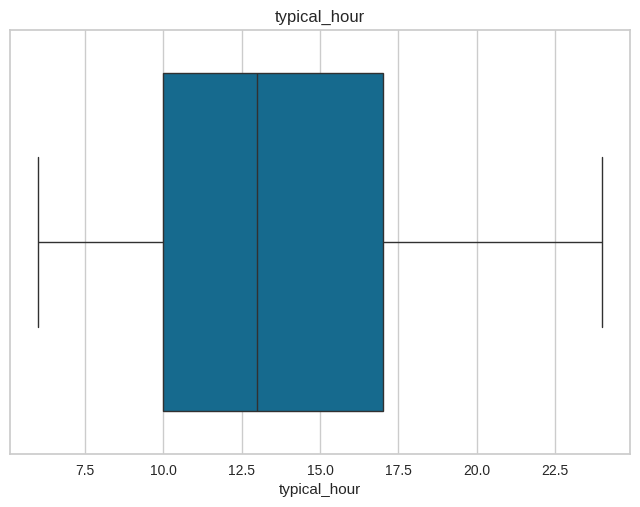

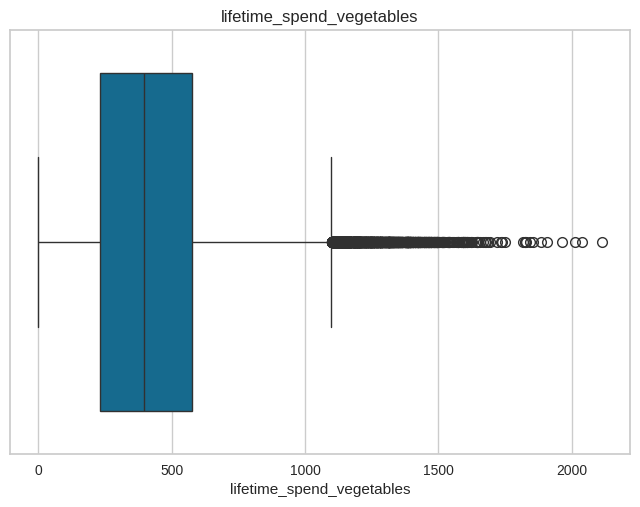

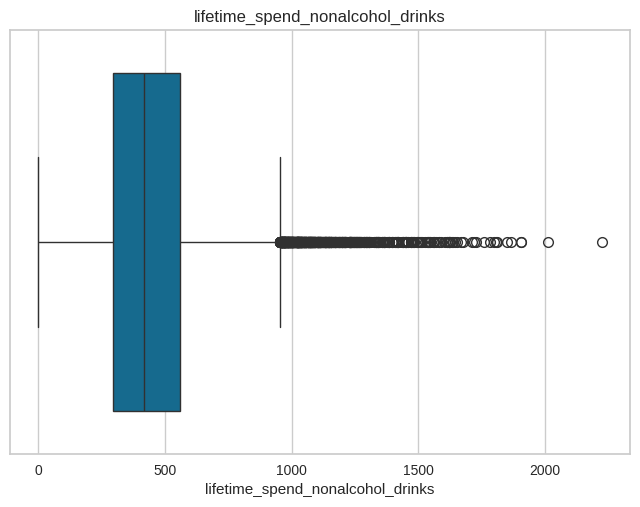

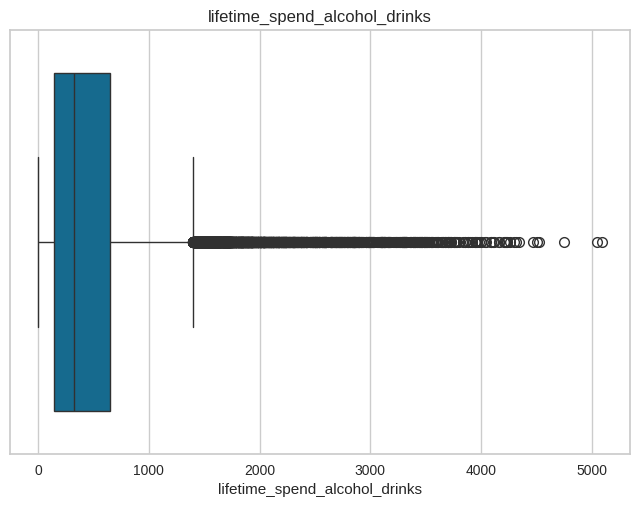

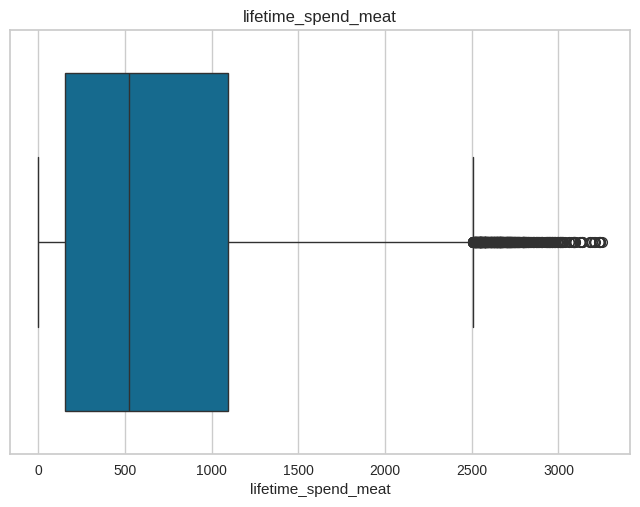

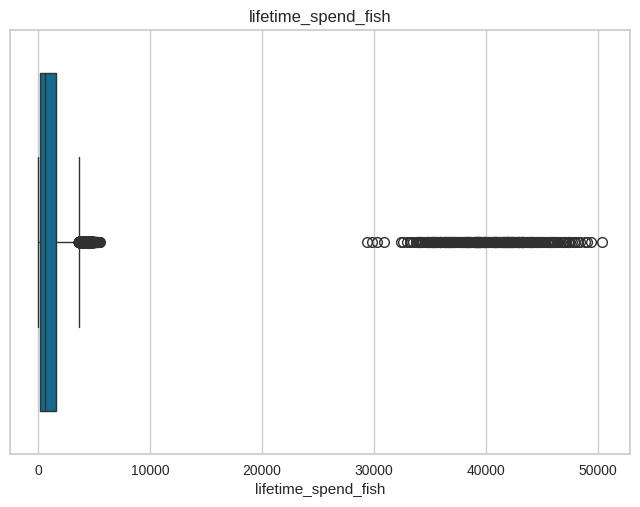

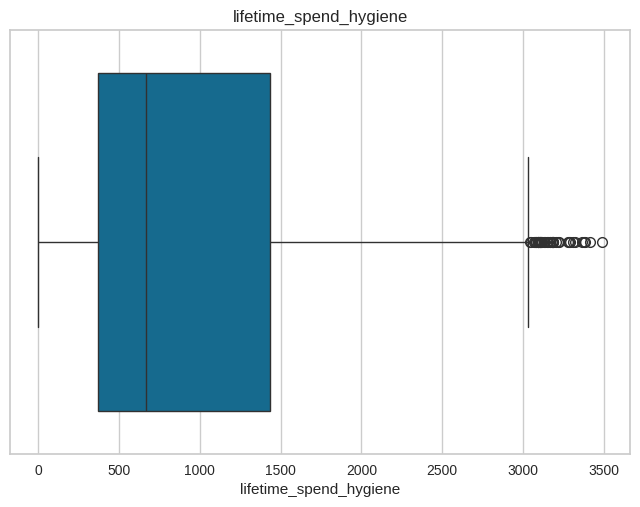

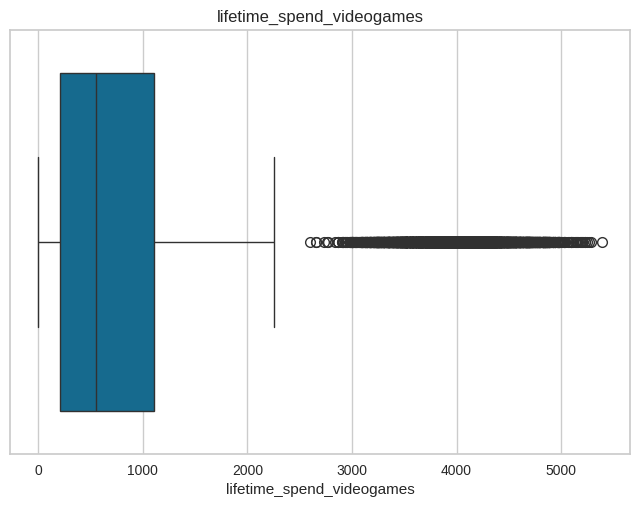

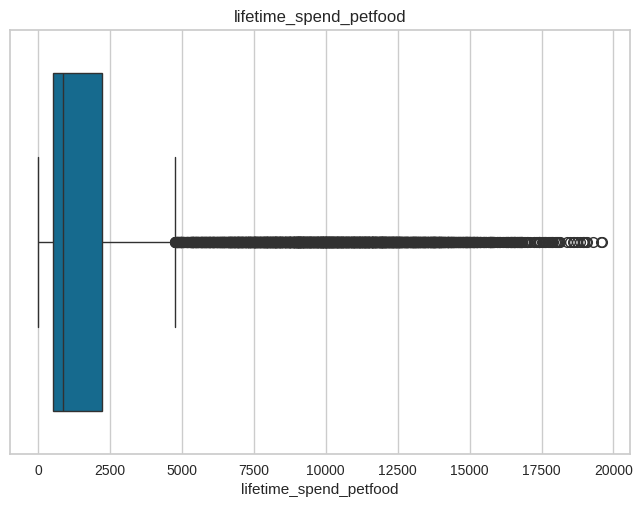

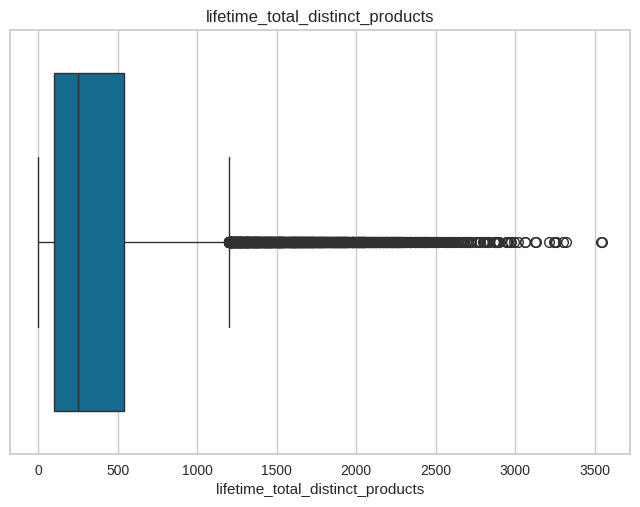

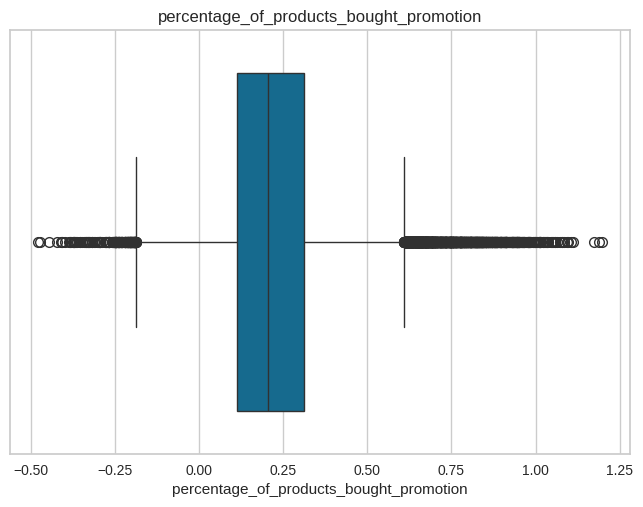

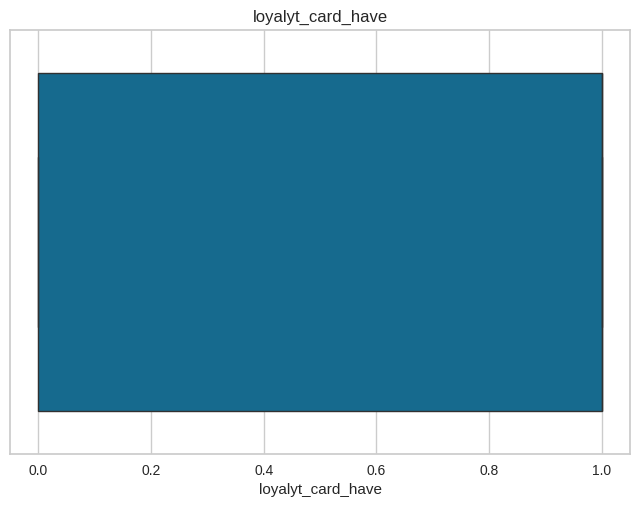

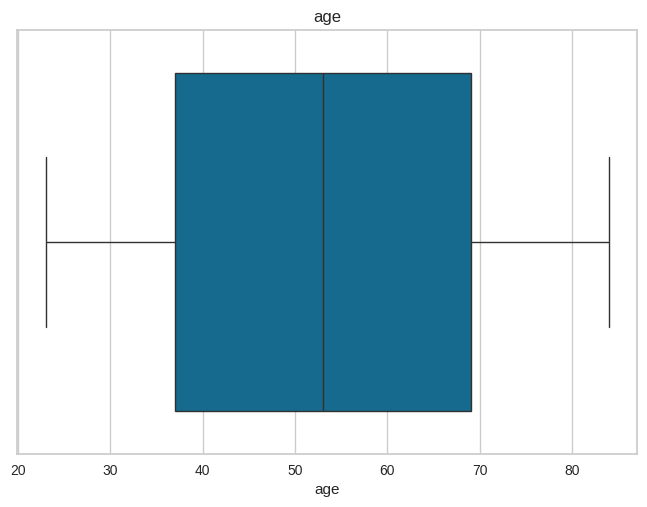

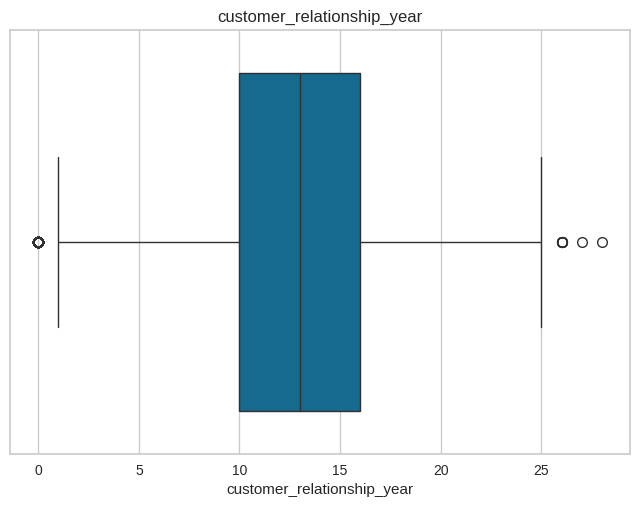

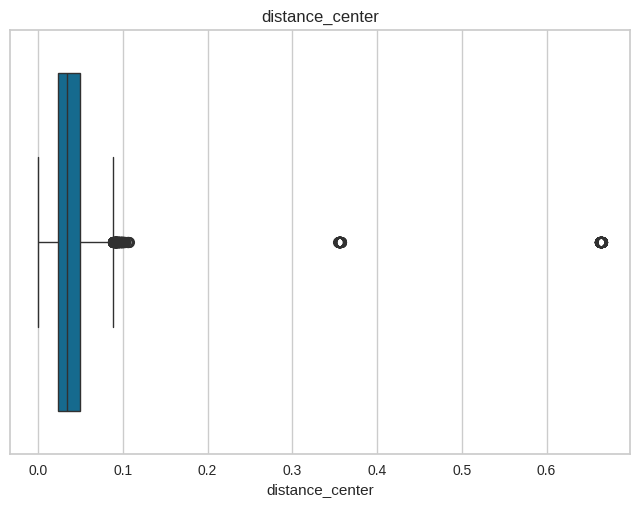

In [79]:
for column in data_d.columns:
    plt.figure()
    sns.boxplot(x=data_d[column])
    plt.title(column)

In [80]:
import pandas as pd

def calculate_outliers(data_d):
    outlier_indices = {}
    outlier_proportions = {}

    for column in data_d.columns:
        if pd.api.types.is_numeric_dtype(data_d[column]):
            q1 = data_d[column].quantile(0.25)
            q3 = data_d[column].quantile(0.75)
            IQR = q3 - q1

            lower_bound = q1 - 1.5 * IQR
            upper_bound = q3 + 1.5 * IQR

            outliers_min = data_d[data_d[column] < lower_bound].index.to_series()
            outliers_max = data_d[data_d[column] > upper_bound].index.to_series()

            outliers = pd.concat([outliers_min, outliers_max], axis=0).unique()
            outlier_indices[column] = outliers

            outlier_proportion = len(outliers) / len(data_d[column])
            outlier_proportions[column] = outlier_proportion

    return outlier_indices, outlier_proportions

# Example usage:
# Assuming your dataset is loaded into a DataFrame called data_d
outliers, proportions = calculate_outliers(data_d)

for column, proportion in proportions.items():
    print(f"Proportion of outliers in {column}: {proportion}")


Proportion of outliers in customer_gender: 0.0
Proportion of outliers in kids_home: 0.09484082418463936
Proportion of outliers in teens_home: 0.05019366963855974
Proportion of outliers in number_complaints: 0.0046068162544979484
Proportion of outliers in distinct_stores_visited: 0.0667415369805872
Proportion of outliers in lifetime_spend_groceries: 0.1019687836629919
Proportion of outliers in lifetime_spend_electronics: 0.09348857463729916
Proportion of outliers in typical_hour: 0.0
Proportion of outliers in lifetime_spend_vegetables: 0.05317320253947881
Proportion of outliers in lifetime_spend_nonalcohol_drinks: 0.02142971740276409
Proportion of outliers in lifetime_spend_alcohol_drinks: 0.07001902317159818
Proportion of outliers in lifetime_spend_meat: 0.013751690311934175
Proportion of outliers in lifetime_spend_fish: 0.11659141436134858
Proportion of outliers in lifetime_spend_hygiene: 0.0009396988379821687
Proportion of outliers in lifetime_spend_videogames: 0.1293117278998877
Pro

In [81]:
data_l=data_d.copy()

In [82]:
import pandas as pd

def cap_outliers(data_l, columns):
    for column in columns:
        if pd.api.types.is_numeric_dtype(data_l[column]):
            q1 = data_l[column].quantile(0.25)
            q3 = data_l[column].quantile(0.75)
            IQR = q3 - q1

            lower_bound = q1 - 1.5 * IQR
            upper_bound = q3 + 1.5 * IQR

            data_l[column] = data_l[column].clip(lower=lower_bound, upper=upper_bound)

    return data_l

# Örnek kullanım:
# Varsayalım ki veri setiniz data_l adında bir DataFrame'de yüklü
columns_with_outliers = ['kids_home', 'teens_home', 'number_complaints', 'distinct_stores_visited', 'lifetime_spend_hygiene', 'customer_relationship_year']
data_l = cap_outliers(data_l, columns_with_outliers)

# Baskılanmış sütunları kontrol etmek için:
print(data_l.head())


   customer_gender  kids_home  teens_home  number_complaints  \
0                1        1.0         1.0                1.0   
1                0        1.0         0.0                1.0   
2                0        0.0         1.0                1.0   
3                0        0.0         0.0                0.0   
4                1        0.0         0.0                0.0   

   distinct_stores_visited  lifetime_spend_groceries  \
0                      2.0                   18306.0   
1                      2.0                    5015.0   
2                      3.0                    3097.0   
3                      1.0                   10825.0   
4                      1.0                     697.0   

   lifetime_spend_electronics  typical_hour  lifetime_spend_vegetables  \
0                      7106.0      17.00000                      484.0   
1                      1334.0       8.00000                      344.0   
2                      4073.0      10.00000             

<ipython-input-83-db642467f4d4>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


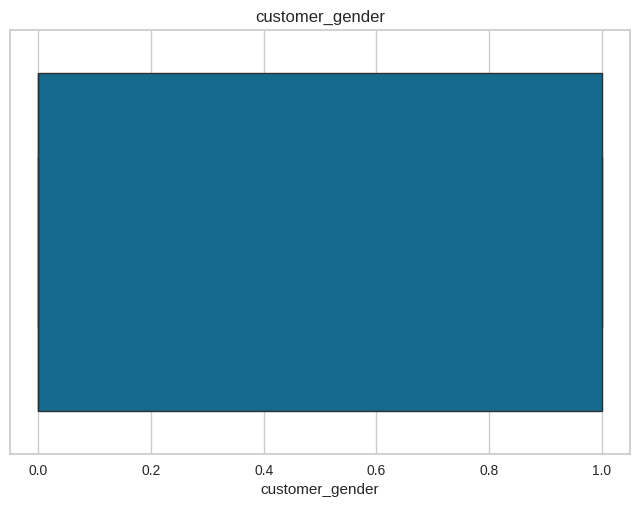

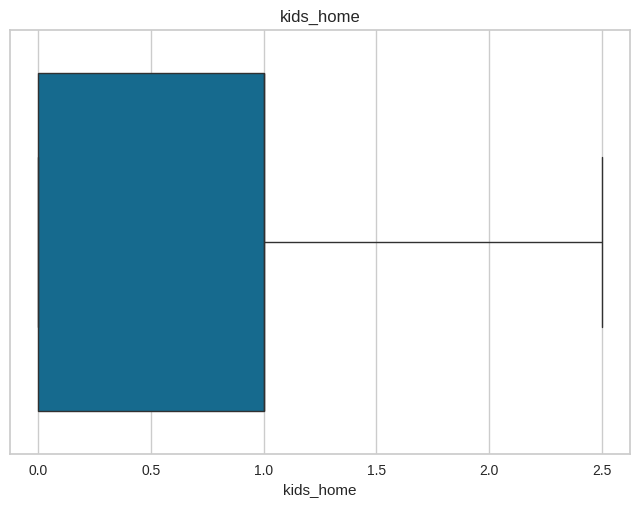

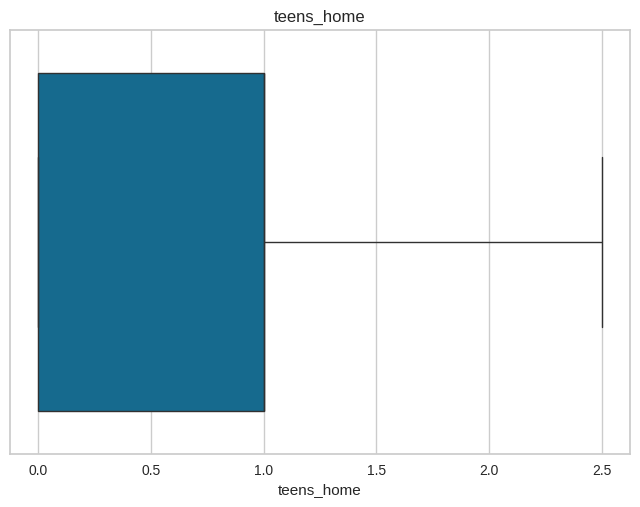

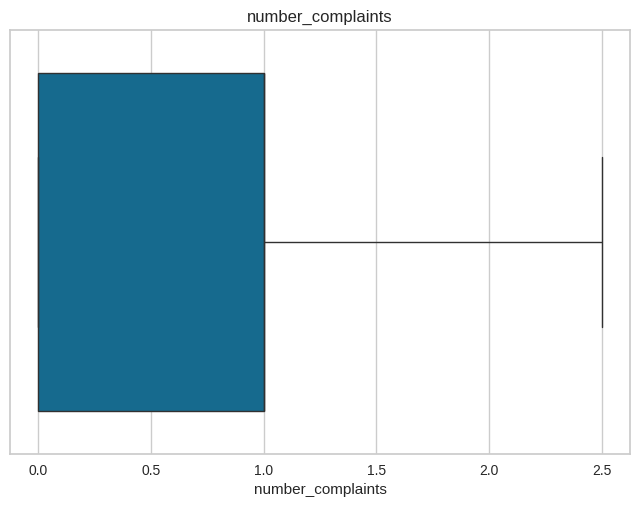

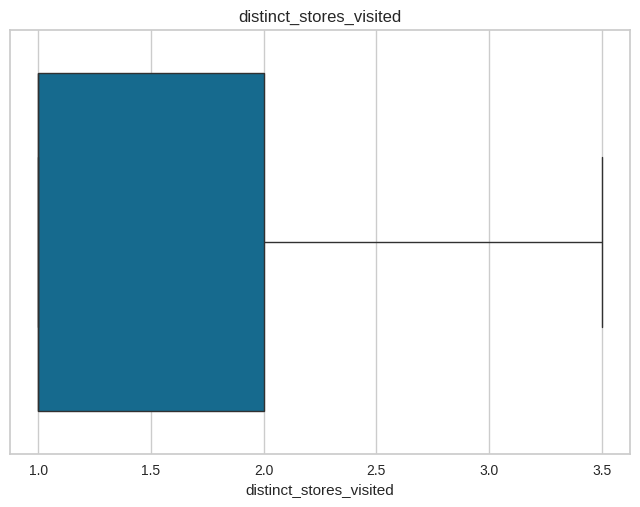

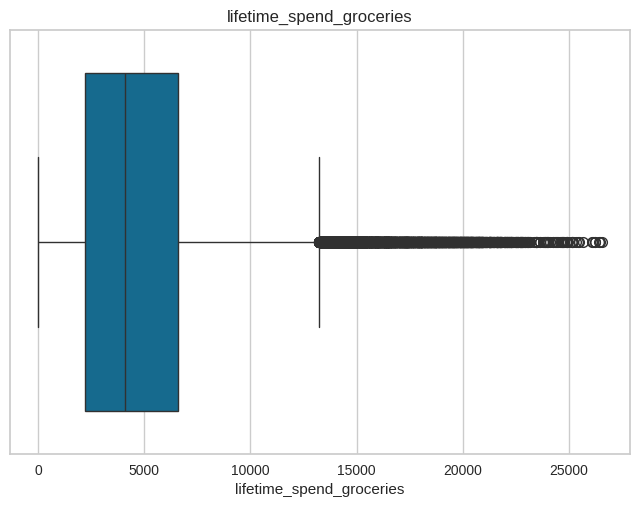

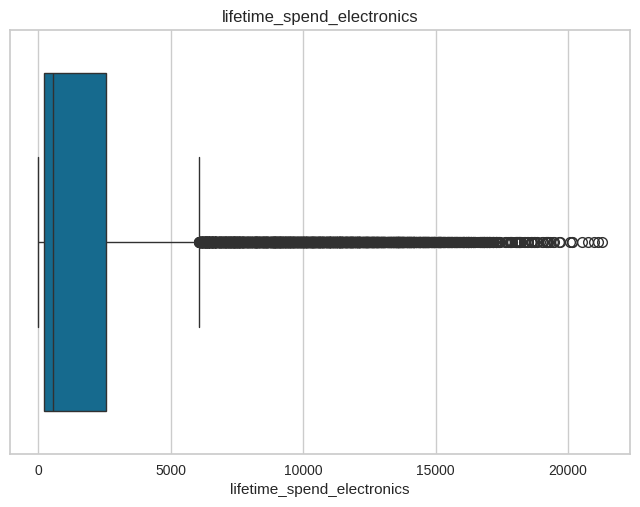

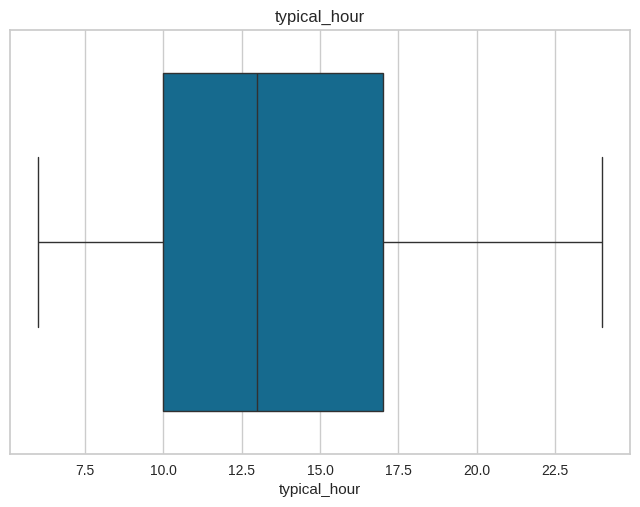

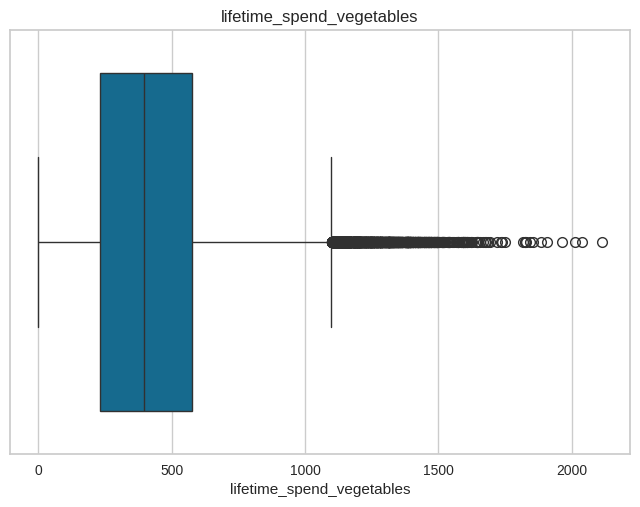

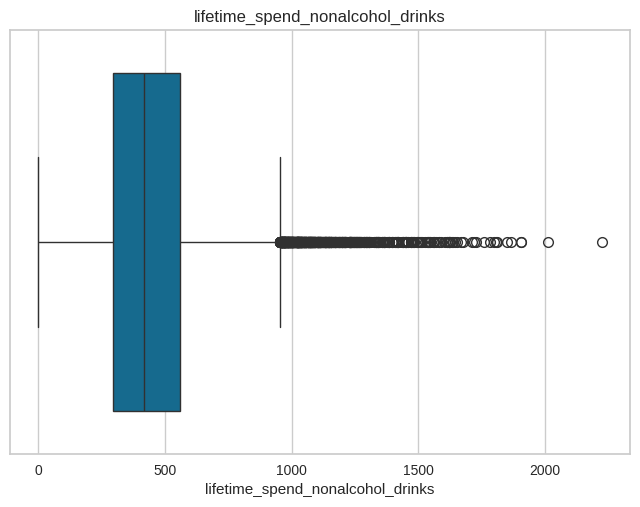

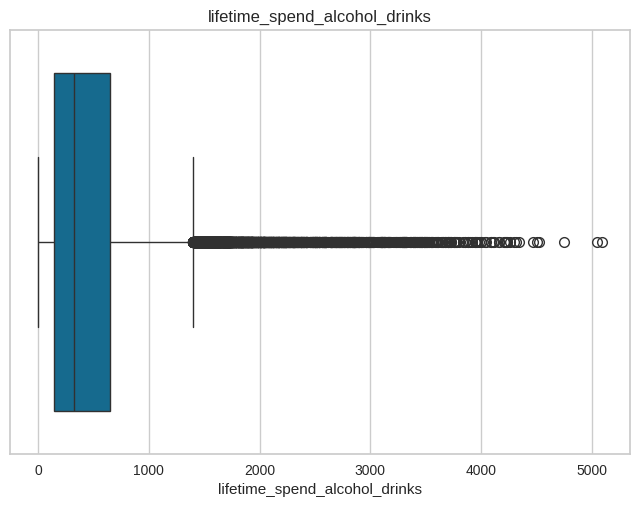

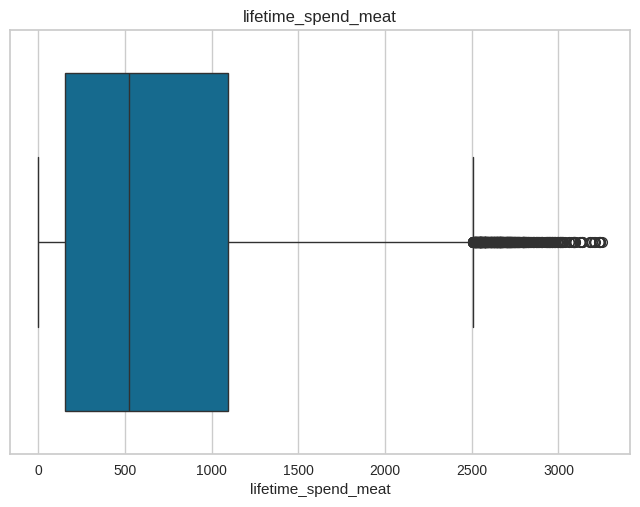

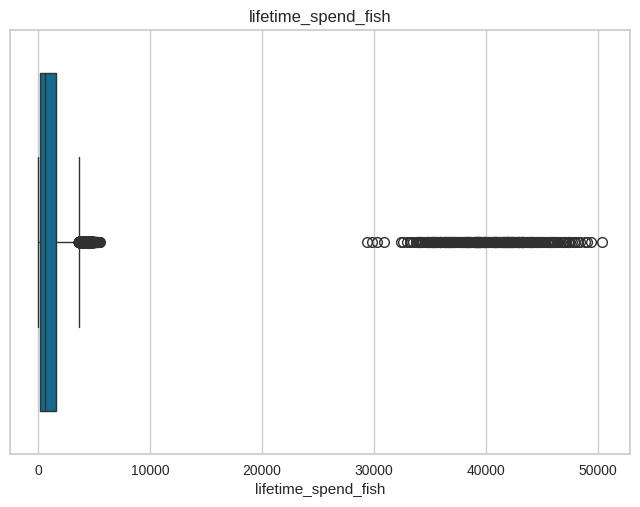

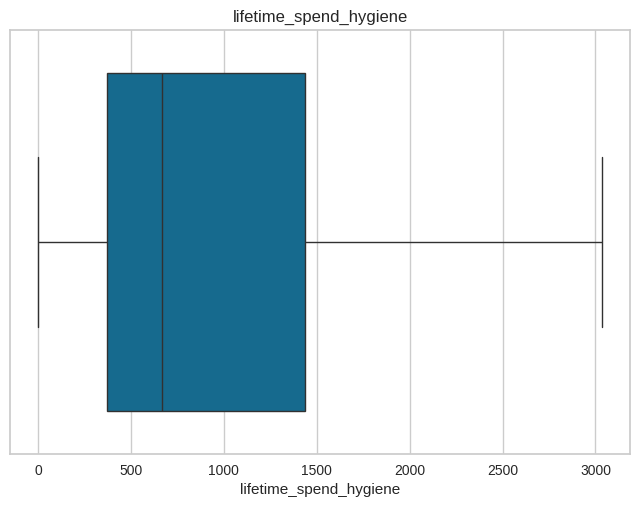

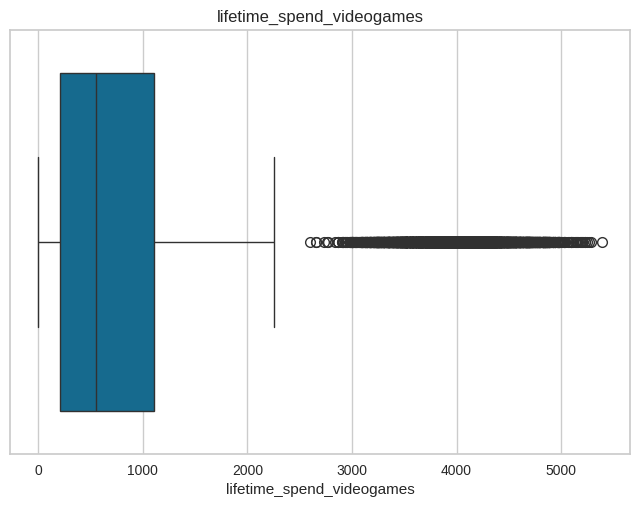

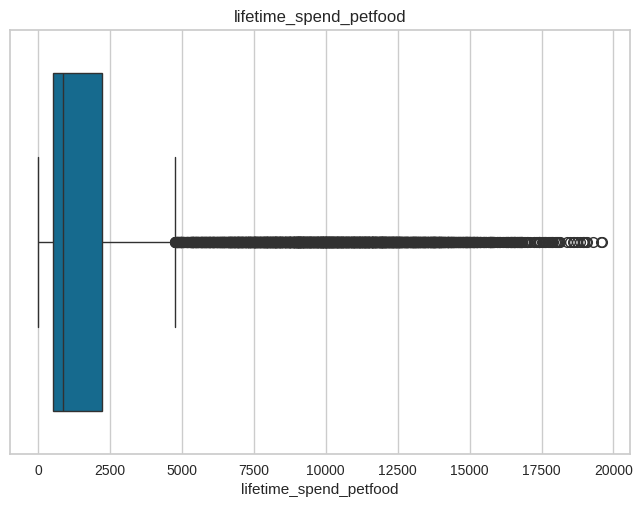

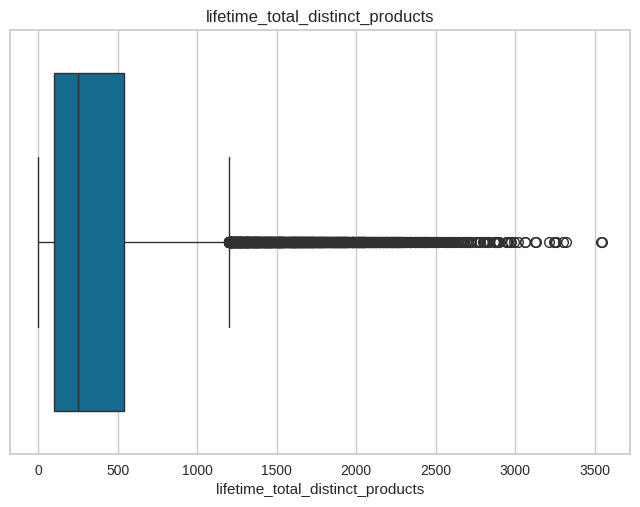

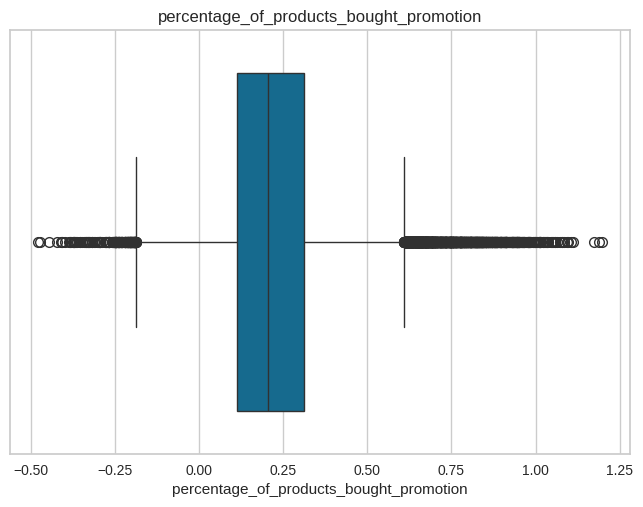

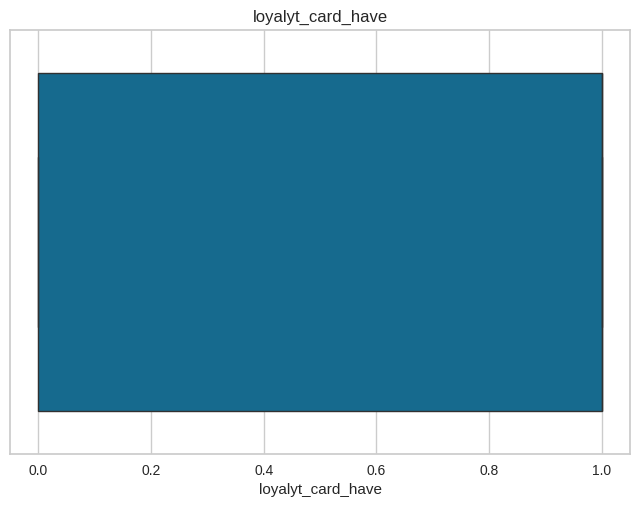

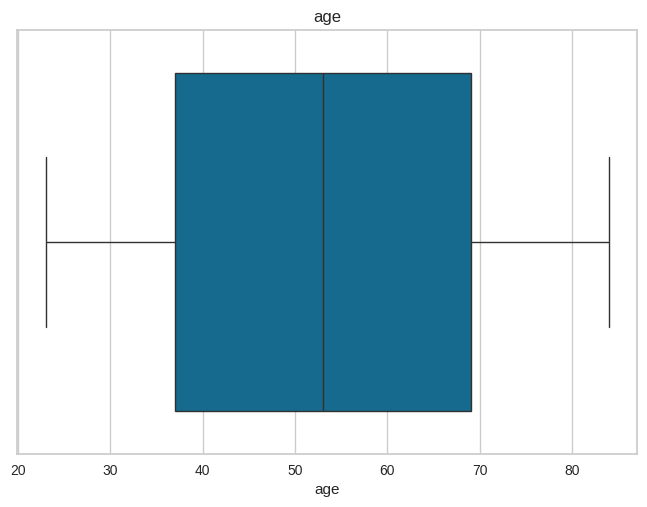

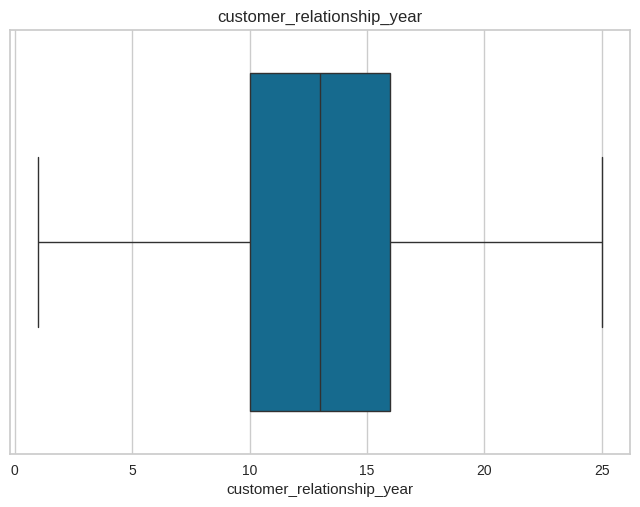

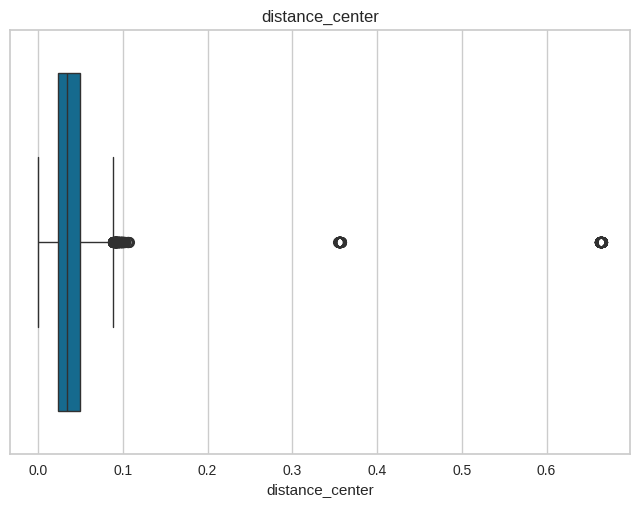

In [83]:
for column in data_l.columns:
    plt.figure()
    sns.boxplot(x=data_l[column])
    plt.title(column)

**We have not touched the other ouliers because they ensure the meaningfulness of the data.**

In [84]:
print(data_l)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



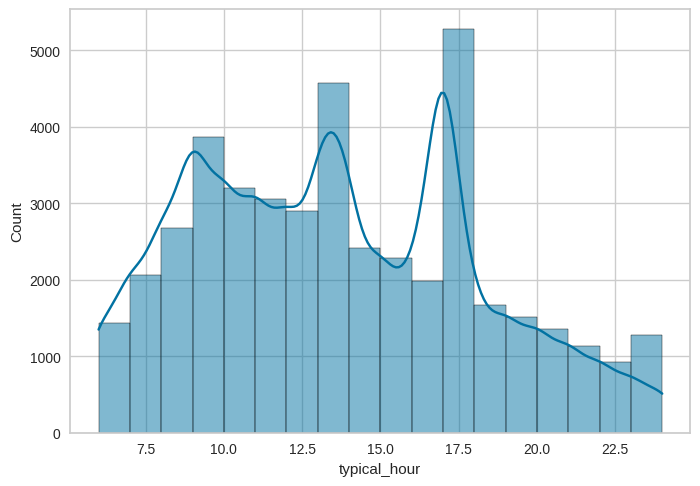

In [85]:
sns.histplot(data=data_l, x="typical_hour", bins=18, kde=True)
plt.show()

In [86]:
def find_time_slot(hour):
    time_slots = {
        "early_morning": range(6, 9),
        "morning": range(9, 13),
        "afternoon": range(13, 18),
        "evening": range(18, 22),
        "night": range(22, 24)
    }
    for slot, hour_range in time_slots.items():
        if hour in hour_range:
            return slot
    return None


data_l["time_slot"] = data_l["typical_hour"].apply(find_time_slot)

print(data_l)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [87]:
pd.set_option('display.max_rows', 10)

In [88]:
print(data_l[["typical_hour","time_slot"]])

       typical_hour      time_slot
0          17.00000      afternoon
1           8.00000  early_morning
2          10.00000        morning
3          17.00000      afternoon
4          13.52058           None
...             ...            ...
43626      17.00000      afternoon
43627      12.00000        morning
43628      12.00000        morning
43629       6.00000  early_morning
43630      10.00000        morning

[43631 rows x 2 columns]


<Axes: xlabel='time_slot'>

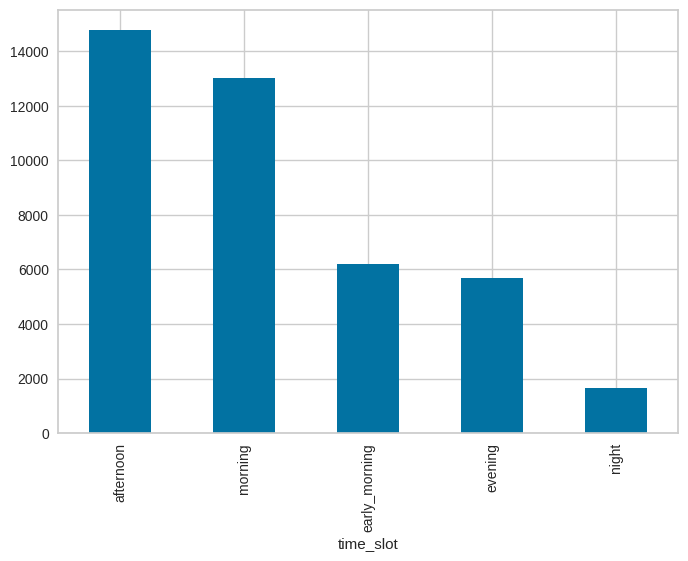

In [89]:
data_l["time_slot"].value_counts().plot(kind="bar")

In [90]:
data_l.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43631 entries, 0 to 43630
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_gender                          43631 non-null  int64  
 1   kids_home                                43631 non-null  float64
 2   teens_home                               43631 non-null  float64
 3   number_complaints                        43631 non-null  float64
 4   distinct_stores_visited                  43631 non-null  float64
 5   lifetime_spend_groceries                 43631 non-null  float64
 6   lifetime_spend_electronics               43631 non-null  float64
 7   typical_hour                             43631 non-null  float64
 8   lifetime_spend_vegetables                43631 non-null  float64
 9   lifetime_spend_nonalcohol_drinks         43631 non-null  float64
 10  lifetime_spend_alcohol_drinks            43631

In [91]:
ohc_cols =["customer_gender","time_slot"]
df_encoded_k = data_l[ohc_cols]
df_encoded_k.head()

customer_gender      time_slot
0                1      afternoon
1                0  early_morning
2                0        morning
3                0      afternoon
4                1           None

In [92]:
df_encoded_k=pd.get_dummies(df_encoded_k,columns=ohc_cols,drop_first=True)
print(df_encoded_k)

       customer_gender_1  time_slot_early_morning  time_slot_evening  \
0                   True                    False              False   
1                  False                     True              False   
2                  False                    False              False   
3                  False                    False              False   
4                   True                    False              False   
...                  ...                      ...                ...   
43626              False                    False              False   
43627              False                    False              False   
43628              False                    False              False   
43629              False                     True              False   
43630               True                    False              False   

       time_slot_morning  time_slot_night  
0                  False            False  
1                  False            False  
2  

In [93]:
df_encoded_k = df_encoded_k.replace({ True:1, False:0})

print(df_encoded_k)

       customer_gender_1  time_slot_early_morning  time_slot_evening  \
0                      1                        0                  0   
1                      0                        1                  0   
2                      0                        0                  0   
3                      0                        0                  0   
4                      1                        0                  0   
...                  ...                      ...                ...   
43626                  0                        0                  0   
43627                  0                        0                  0   
43628                  0                        0                  0   
43629                  0                        1                  0   
43630                  1                        0                  0   

       time_slot_morning  time_slot_night  
0                      0                0  
1                      0                0  
2  

In [94]:
df=pd.concat([data_l,df_encoded_k],axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43631 entries, 0 to 43630
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_gender                          43631 non-null  int64  
 1   kids_home                                43631 non-null  float64
 2   teens_home                               43631 non-null  float64
 3   number_complaints                        43631 non-null  float64
 4   distinct_stores_visited                  43631 non-null  float64
 5   lifetime_spend_groceries                 43631 non-null  float64
 6   lifetime_spend_electronics               43631 non-null  float64
 7   typical_hour                             43631 non-null  float64
 8   lifetime_spend_vegetables                43631 non-null  float64
 9   lifetime_spend_nonalcohol_drinks         43631 non-null  float64
 10  lifetime_spend_alcohol_drinks            43631

In [95]:
df.drop(columns=["customer_gender","typical_hour"],inplace=True)

In [96]:
df.drop(columns=["time_slot"],inplace=True)

In [97]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43631 entries, 0 to 43630
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   kids_home                                43631 non-null  float64
 1   teens_home                               43631 non-null  float64
 2   number_complaints                        43631 non-null  float64
 3   distinct_stores_visited                  43631 non-null  float64
 4   lifetime_spend_groceries                 43631 non-null  float64
 5   lifetime_spend_electronics               43631 non-null  float64
 6   lifetime_spend_vegetables                43631 non-null  float64
 7   lifetime_spend_nonalcohol_drinks         43631 non-null  float64
 8   lifetime_spend_alcohol_drinks            43631 non-null  float64
 9   lifetime_spend_meat                      43631 non-null  float64
 10  lifetime_spend_fish                      43631

In [98]:
from sklearn.decomposition import PCA

In [99]:
X=df

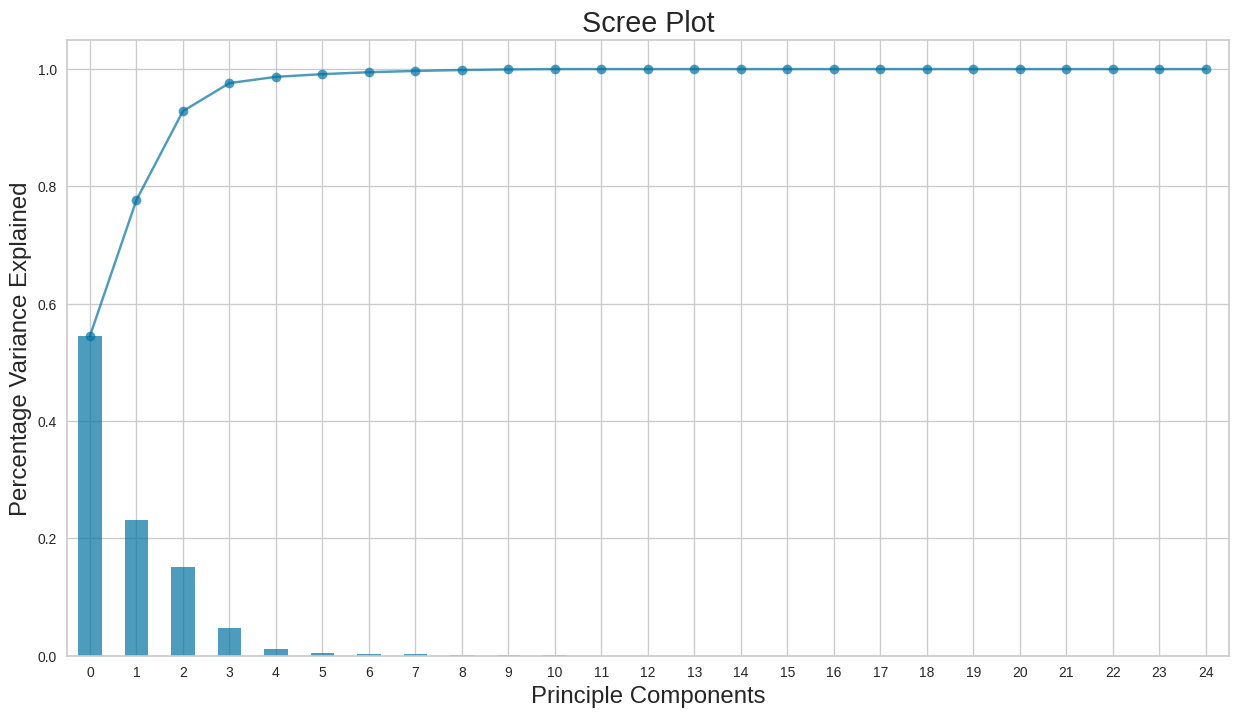

In [100]:
pca = PCA()
pca.fit(X)
sns.color_palette("YlOrBr", as_cmap=True)
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_)
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7) #plot line chart of increasing variances
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Scree Plot", fontsize="xx-large")
plt.show();

In [101]:
pca = PCA(n_components=3)
X = pca.fit_transform(X)

In [102]:
kmodel=KMeans(n_clusters=5,random_state=42)
kfit=kmodel.fit(X)
kumeler=kfit.labels_
merkezler=kfit.cluster_centers_
y_pred = kmodel.predict(X)

data_d['pred_cluster'] = y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

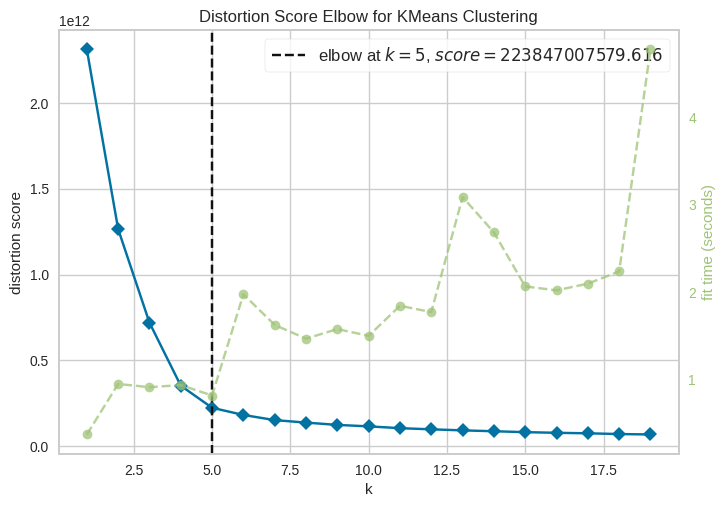

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [103]:
kmodel=KMeans(random_state=42)
grafik=KElbowVisualizer(kmodel,k=(1,20))
grafik.fit(X)
grafik.poof()

In [104]:
import plotly.express as px

fig = px.scatter_3d(X, x= X[:,0], y= X[:,1],z = X[:,2],
                  color=data_d['pred_cluster'], labels={'x':'Feature 1', 'y':'Feature 2','z':'Feature 3'} )
fig.show()

In [105]:
print(df)

       kids_home  teens_home  number_complaints  distinct_stores_visited  \
0            1.0         1.0                1.0                      2.0   
1            1.0         0.0                1.0                      2.0   
2            0.0         1.0                1.0                      3.0   
3            0.0         0.0                0.0                      1.0   
4            0.0         0.0                0.0                      1.0   
...          ...         ...                ...                      ...   
43626        1.0         1.0                0.0                      1.0   
43627        1.0         1.0                1.0                      1.0   
43628        0.0         0.0                0.0                      1.0   
43629        1.0         0.0                1.0                      1.0   
43630        2.0         0.0                2.0                      1.0   

       lifetime_spend_groceries  lifetime_spend_electronics  \
0                       

In [106]:
df["pred_cluster"]=y_pred

In [107]:
df

kids_home  teens_home  number_complaints  distinct_stores_visited  \
0            1.0         1.0                1.0                      2.0   
1            1.0         0.0                1.0                      2.0   
2            0.0         1.0                1.0                      3.0   
3            0.0         0.0                0.0                      1.0   
4            0.0         0.0                0.0                      1.0   
...          ...         ...                ...                      ...   
43626        1.0         1.0                0.0                      1.0   
43627        1.0         1.0                1.0                      1.0   
43628        0.0         0.0                0.0                      1.0   
43629        1.0         0.0                1.0                      1.0   
43630        2.0         0.0                2.0                      1.0   

       lifetime_spend_groceries  lifetime_spend_electronics  \
0                       18306.0                      7106.0   
1                        5015.0                      1334.0   
2                        3097.0                      4073.0   
3                       10825.0                       207.0   
4                         697.0                       570.0   
...                         ...                         ...   
43626                    7189.0                      6293.0   
43627                   11238.0                     11490.0   
43628                    6059.0                       241.0   
43629                    3098.0                       425.0   
43630                    6869.0                      1554.0   

       lifetime_spend_vegetables  lifetime_spend_nonalcohol_drinks  \
0                          484.0                             604.0   
1                          344.0                             374.0   
2                          301.0                             852.0   
3                          153.0                             252.0   
4                            8.0                              33.0   
...                          ...                               ...   
43626                      678.0                             741.0   
43627                      602.0                             557.0   
43628                      289.0                             420.0   
43629                      866.0                             369.0   
43630                      268.0                             659.0   

       lifetime_spend_alcohol_drinks  lifetime_spend_meat  \
0                              943.0               2226.0   
1                             1217.0               1068.0   
2                             1731.0                446.0   
3                               60.0                285.0   
4                             2833.0                 54.0   
...                              ...                  ...   
43626                          639.0               1569.0   
43627                         1503.0               2610.0   
43628                           43.0                331.0   
43629                          222.0                  1.0   
43630                         1097.0                698.0   

       lifetime_spend_fish  lifetime_spend_hygiene  lifetime_spend_videogames  \
0                   4056.0                  2174.0                     3946.0   
1                   1925.0                  2115.0                     1028.0   
2                   2347.0                  1306.0                     1504.0   
3                    151.0                    53.0                        0.0   
4                    172.0                   587.0                      223.0   
...                    ...                     ...                        ...   
43626               3779.0                  1748.0                     4387.0   
43627               3893.0                  1621.0                     3831.0   
43628                142.0        

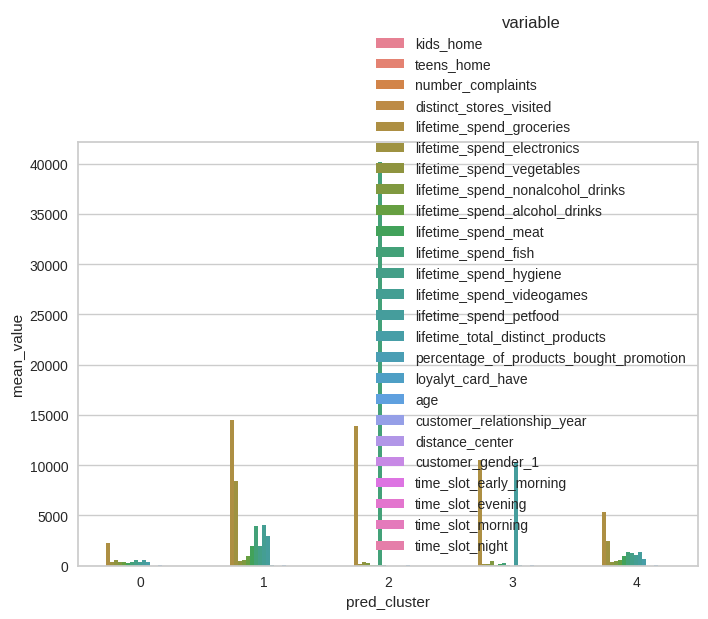

In [108]:
mean_values = df.groupby('pred_cluster').mean().reset_index()

# Veri setini 'pred_cluster' sütununu kullanarak uzun formata dönüştürme
mean_values_long = pd.melt(mean_values, id_vars=['pred_cluster'], var_name='variable', value_name='mean_value')

# seaborn ile çubuk grafiği çizdirme
sns.barplot(x='pred_cluster', y='mean_value', hue='variable', data=mean_values_long)

# Grafiği gösterme
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



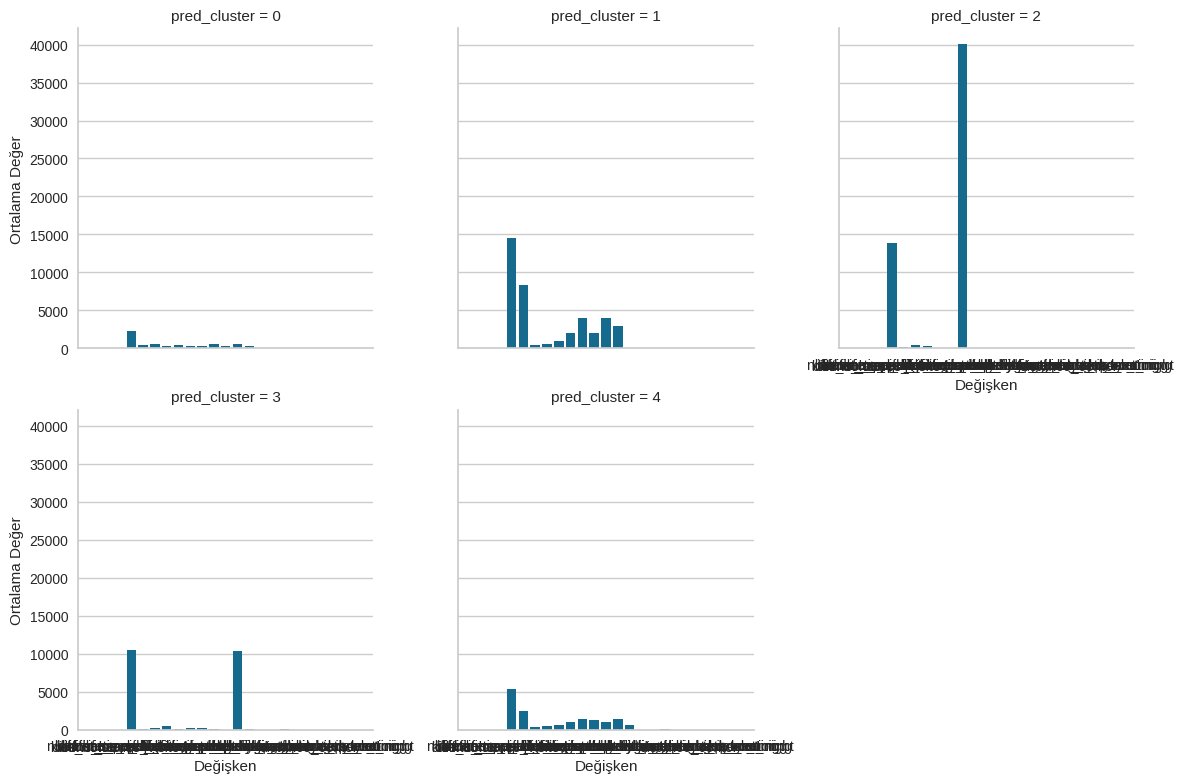

In [109]:
mean_values = df.groupby('pred_cluster').mean().reset_index()

# Veri setini 'pred_cluster' sütununu kullanarak uzun formata dönüştürme
mean_values_long = pd.melt(mean_values, id_vars=['pred_cluster'], var_name='variable', value_name='mean_value')

# seaborn ile FacetGrid kullanarak her bir pred_cluster için ayrı grafik oluşturma
g = sns.FacetGrid(mean_values_long, col="pred_cluster", col_wrap=3, height=4)
g.map(sns.barplot, "variable", "mean_value")
g.set_axis_labels("Değişken", "Ortalama Değer")
plt.show()

In [110]:
grouped = df.groupby('pred_cluster').describe()

grouped.T

pred_cluster                      0            1           2            3  \
kids_home       count  19753.000000  5237.000000  388.000000  3982.000000   
                mean       0.796605     1.003114    0.039916     0.016021   
                std        0.523467     0.114211    0.199460     0.130653   
                min        0.000000     0.000000    0.000000     0.000000   
                25%        0.000000     1.000000    0.000000     0.000000   
...                             ...          ...         ...          ...   
time_slot_night min        0.000000     0.000000    0.000000     0.000000   
                25%        0.000000     0.000000    0.000000     0.000000   
                50%        0.000000     0.000000    0.000000     0.000000   
                75%        0.000000     0.000000    0.000000     0.000000   
                max        1.000000     1.000000    0.000000     1.000000   

pred_cluster                      4  
kids_home       count  14271.000000  
                mean       1.310956  
                std        0.937040  
                min        0.000000  
                25%        1.000000  
...                             ...  
time_slot_night min        0.000000  
                25%        0.000000  
                50%        0.000000  
                75%        0.000000  
                max        1.000000  

[200 rows x 5 columns]

In [111]:
print(grouped.T.to_string())


pred_cluster                                              0             1             2             3             4
kids_home                               count  19753.000000   5237.000000    388.000000   3982.000000  14271.000000
                                        mean       0.796605      1.003114      0.039916      0.016021      1.310956
                                        std        0.523467      0.114211      0.199460      0.130653      0.937040
                                        min        0.000000      0.000000      0.000000      0.000000      0.000000
                                        25%        0.000000      1.000000      0.000000      0.000000      1.000000
                                        50%        1.000000      1.000000      0.000000      0.000000      1.000000
                                        75%        1.000000      1.000000      0.000000      0.000000      2.500000
                                        max        2.500000      2.00000

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43631 entries, 0 to 43630
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   kids_home                                43631 non-null  float64
 1   teens_home                               43631 non-null  float64
 2   number_complaints                        43631 non-null  float64
 3   distinct_stores_visited                  43631 non-null  float64
 4   lifetime_spend_groceries                 43631 non-null  float64
 5   lifetime_spend_electronics               43631 non-null  float64
 6   lifetime_spend_vegetables                43631 non-null  float64
 7   lifetime_spend_nonalcohol_drinks         43631 non-null  float64
 8   lifetime_spend_alcohol_drinks            43631 non-null  float64
 9   lifetime_spend_meat                      43631 non-null  float64
 10  lifetime_spend_fish                      43631

<ipython-input-113-3c7a13af3eab>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-113-3c7a13af3eab>:14: UserWarning:


The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.

<ipython-input-113-3c7a13af3eab>:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



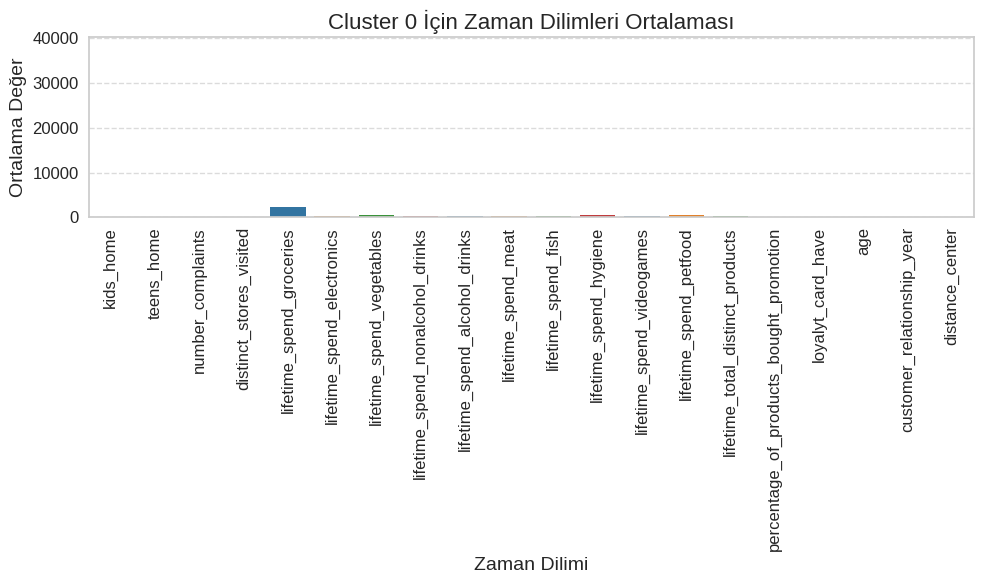

<ipython-input-113-3c7a13af3eab>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-113-3c7a13af3eab>:14: UserWarning:


The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.

<ipython-input-113-3c7a13af3eab>:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



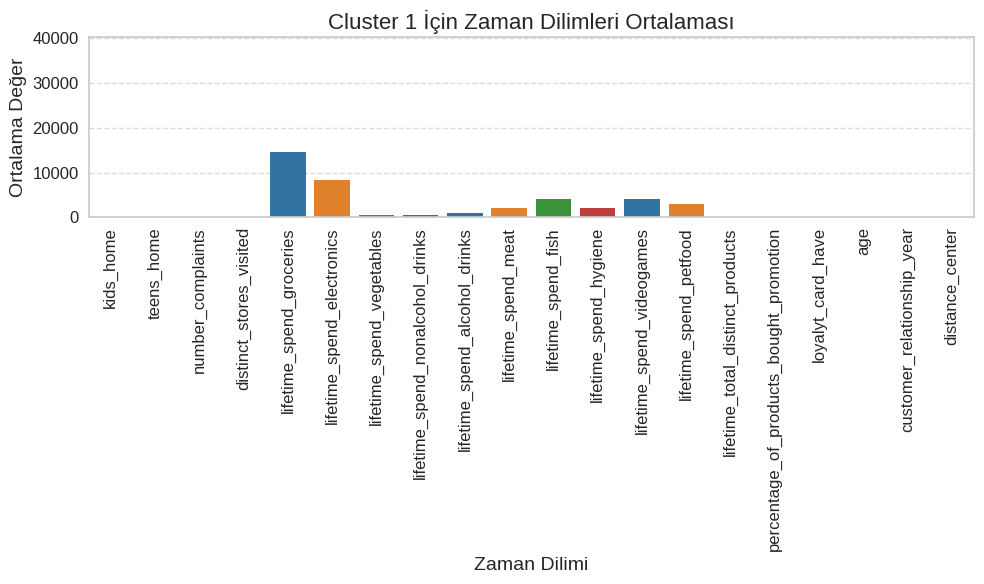

<ipython-input-113-3c7a13af3eab>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-113-3c7a13af3eab>:14: UserWarning:


The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.

<ipython-input-113-3c7a13af3eab>:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



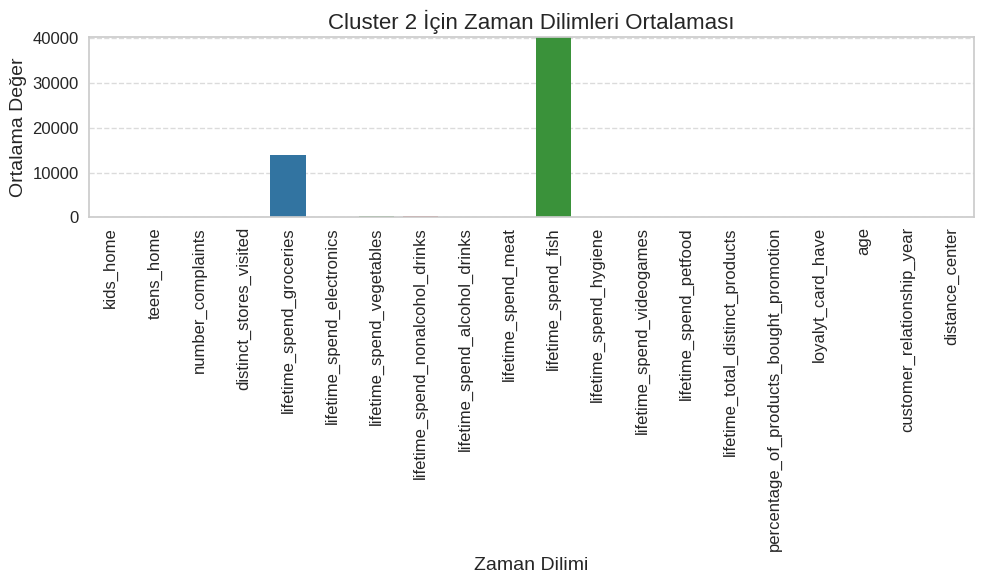

<ipython-input-113-3c7a13af3eab>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-113-3c7a13af3eab>:14: UserWarning:


The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.

<ipython-input-113-3c7a13af3eab>:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



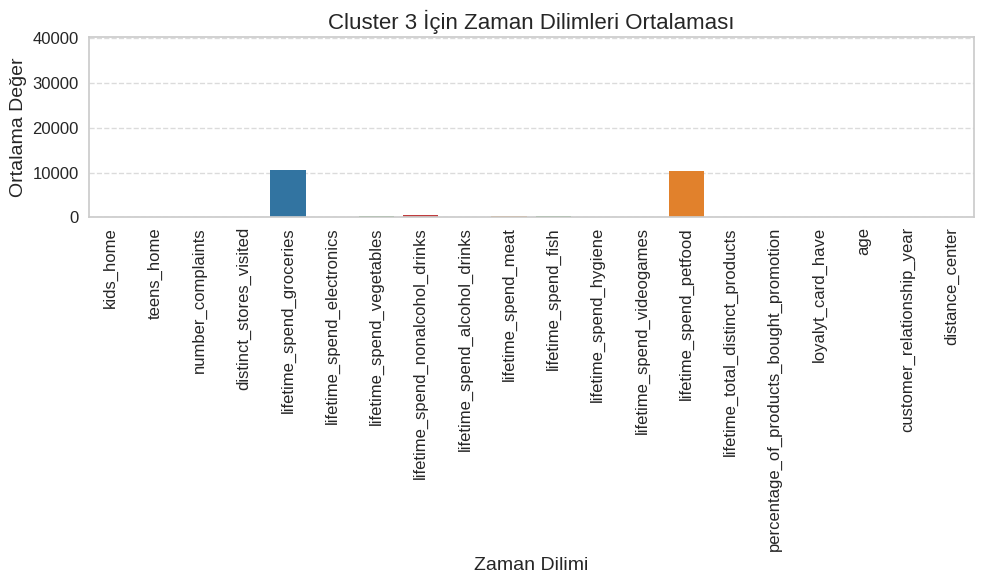

<ipython-input-113-3c7a13af3eab>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-113-3c7a13af3eab>:14: UserWarning:


The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.

<ipython-input-113-3c7a13af3eab>:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



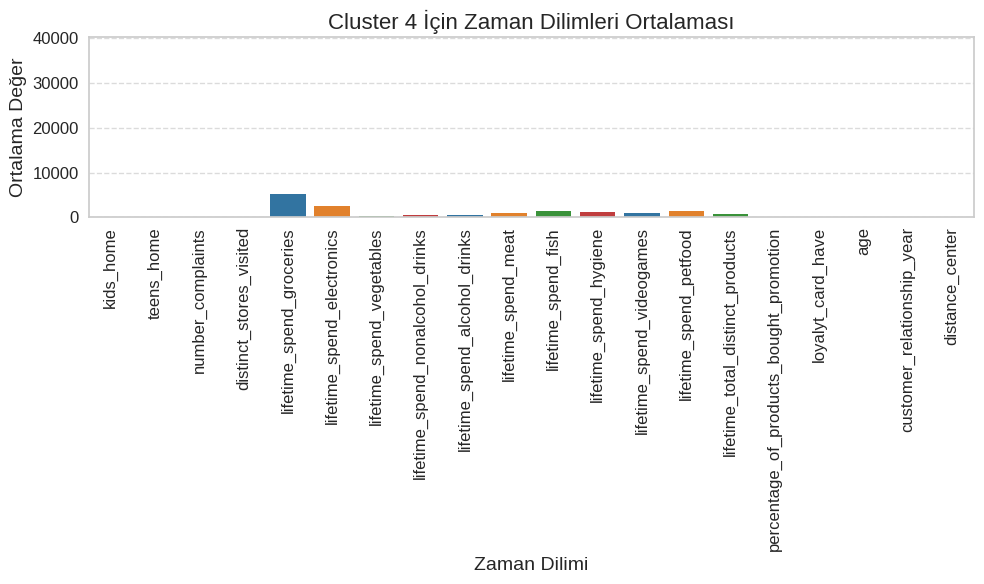

In [113]:
değişken= df.drop(columns=["customer_gender_1","time_slot_early_morning","time_slot_evening","time_slot_morning","time_slot_night"])

grouped = değişken.groupby('pred_cluster').mean().reset_index()

# Maksimum y değeri bulalım
max_y = grouped.drop(columns='pred_cluster').max().max()

# Her cluster için ayrı grafik oluştur
clusters = grouped['pred_cluster'].unique()

for cluster in clusters:
    cluster_data = grouped[grouped['pred_cluster'] == cluster].melt(id_vars='pred_cluster', var_name='Zaman Dilimi', value_name='Ortalama Değer')
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Zaman Dilimi', y='Ortalama Değer', data=cluster_data, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    ax.set_title(f'Cluster {cluster} İçin Zaman Dilimleri Ortalaması', fontsize=16)
    ax.set_xlabel('Zaman Dilimi', fontsize=14)
    ax.set_ylabel('Ortalama Değer', fontsize=14)
    ax.set_ylim(0, max_y)  # Aynı y ekseni sınırlarını ayarla
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

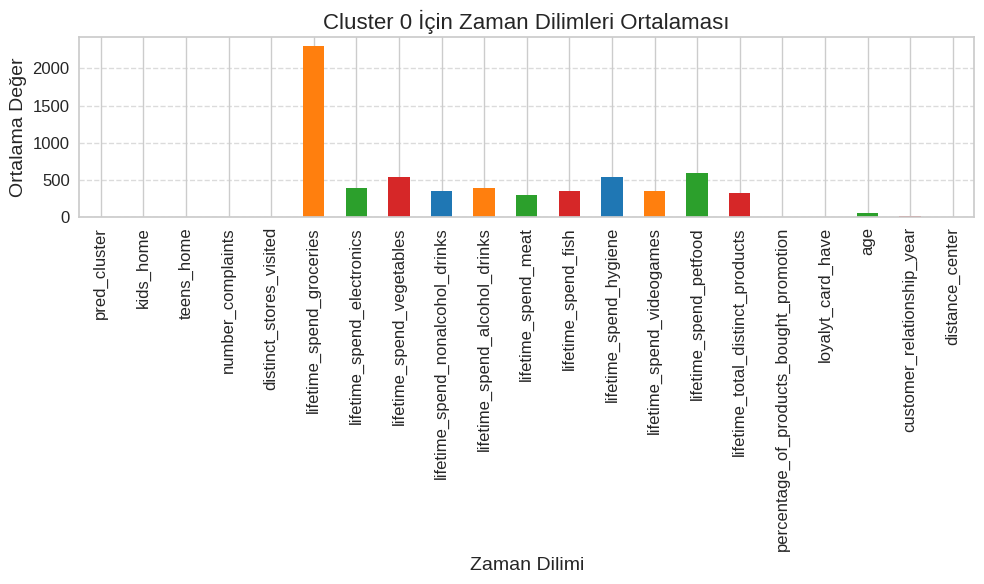

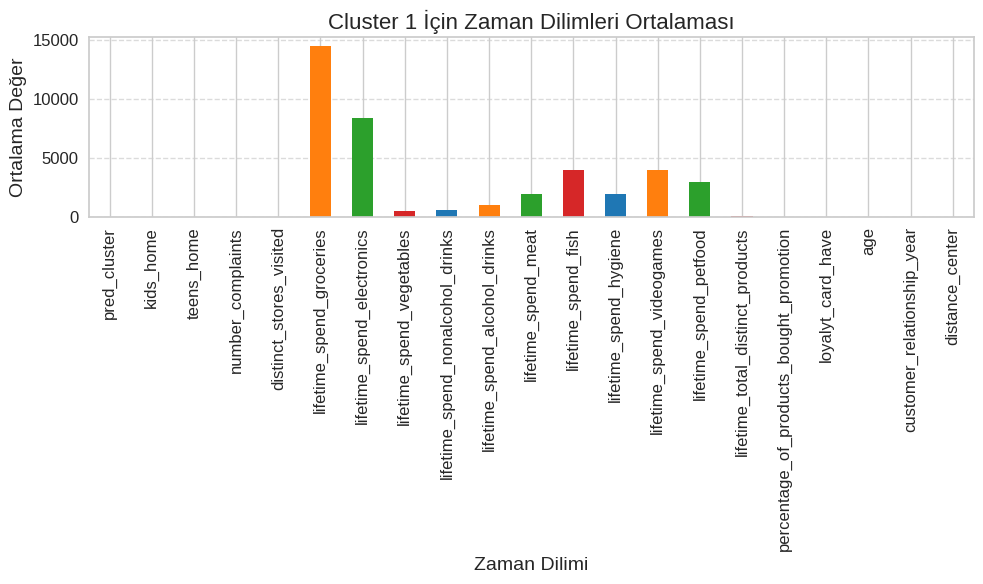

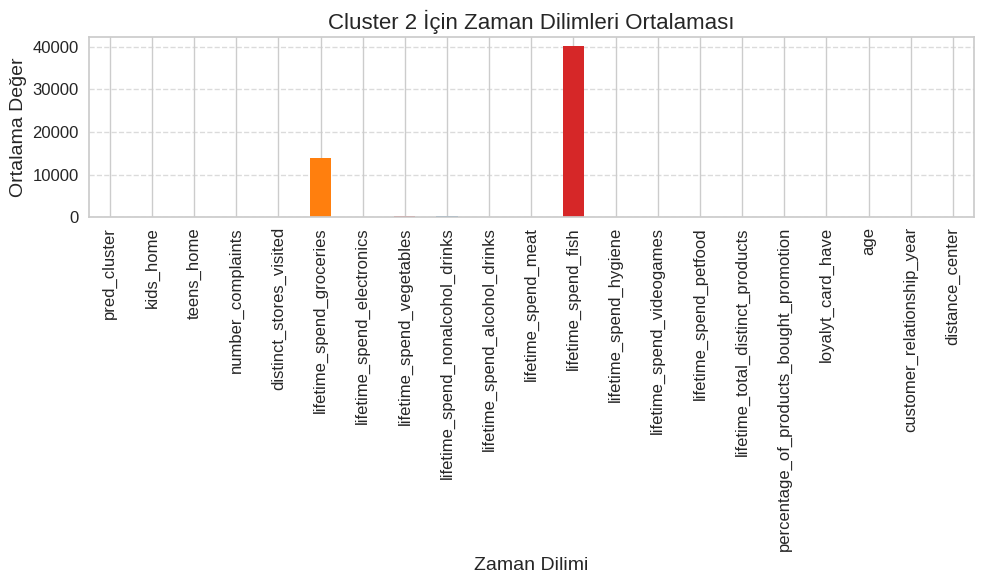

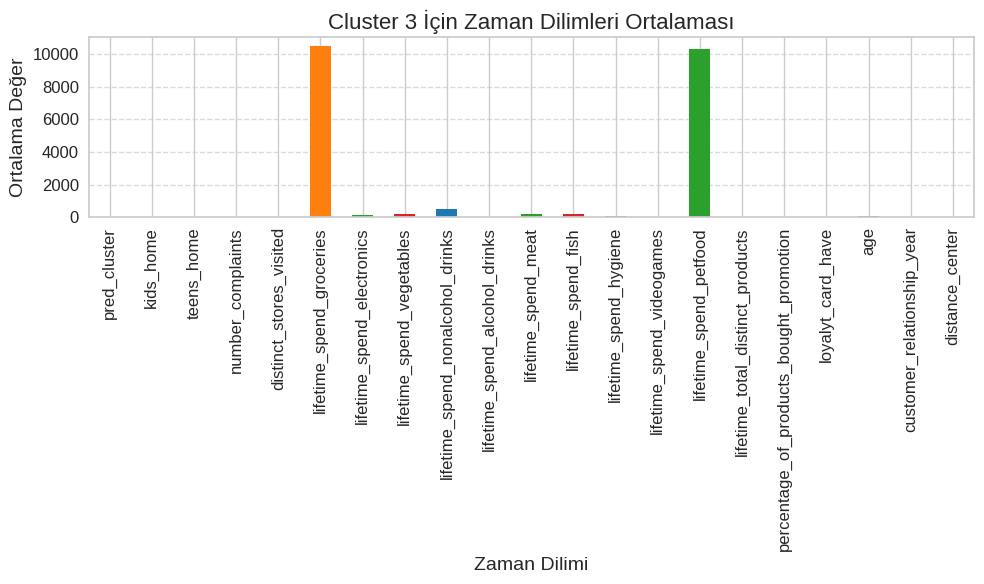

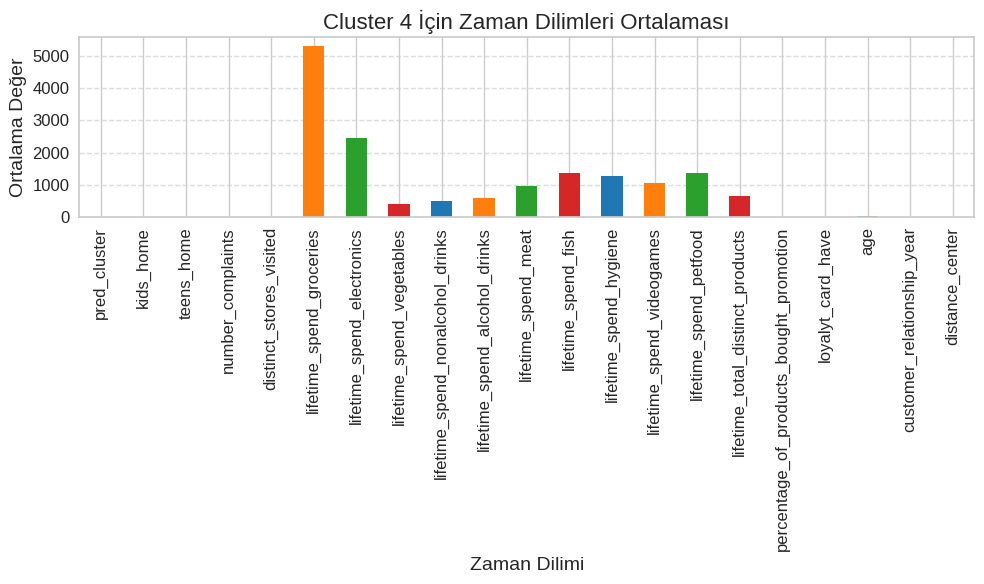

In [114]:
clusters = grouped.index

for cluster in clusters:
    cluster_data = grouped.loc[cluster]
    plt.figure(figsize=(10, 6))
    ax = cluster_data.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    plt.title(f'Cluster {cluster} İçin Zaman Dilimleri Ortalaması', fontsize=16)
    plt.xlabel('Zaman Dilimi', fontsize=14)
    plt.ylabel('Ortalama Değer', fontsize=14)
    plt.xticks(rotation=90, fontsize=12, ha='center')
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # x ekseni etiketlerini doğrudan sütunların altına yerleştir
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('center')

    plt.show()

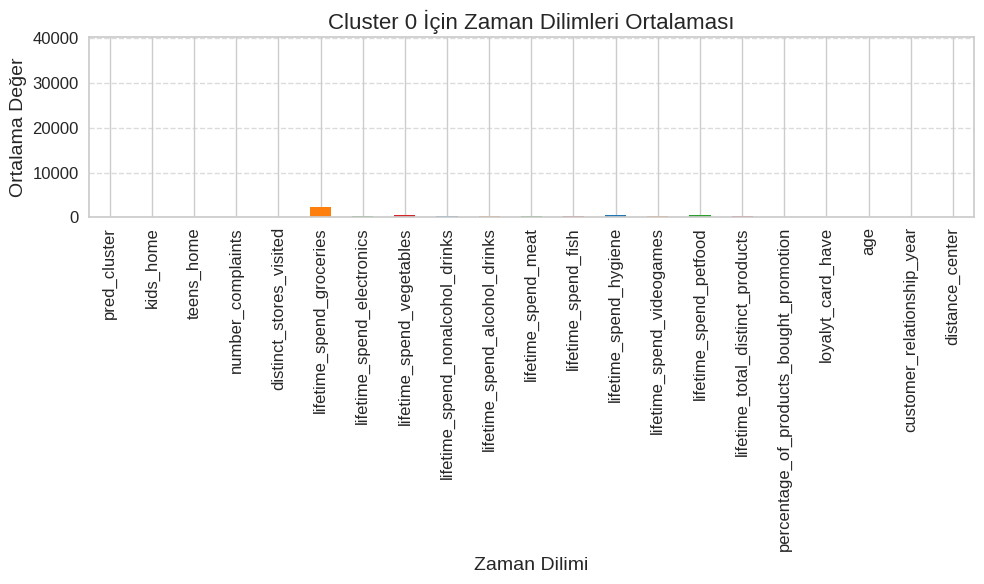

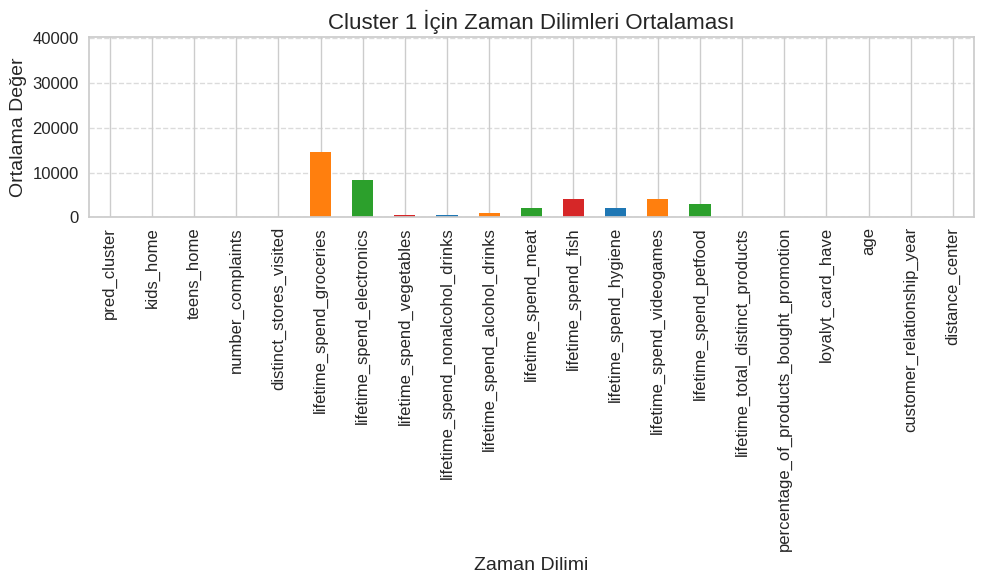

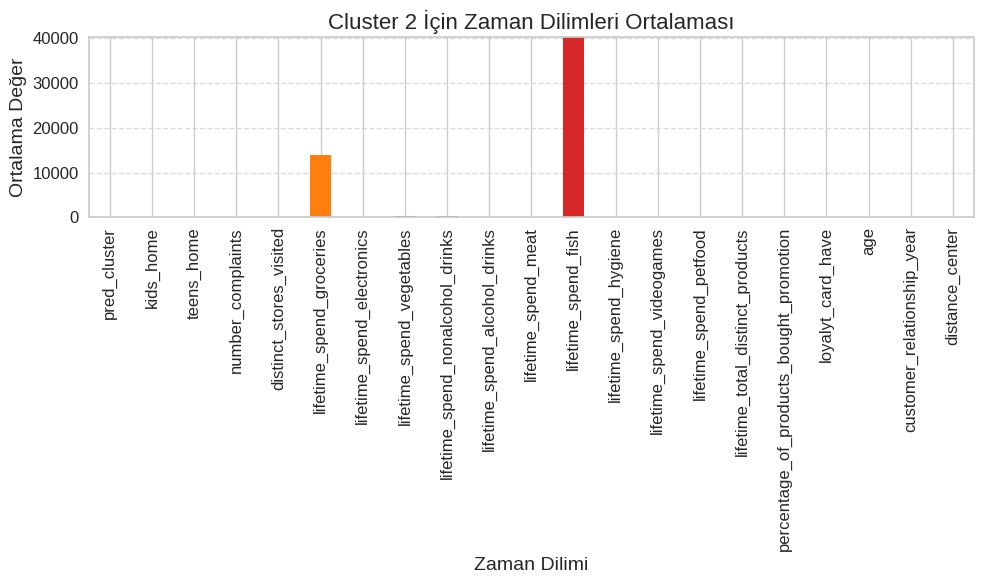

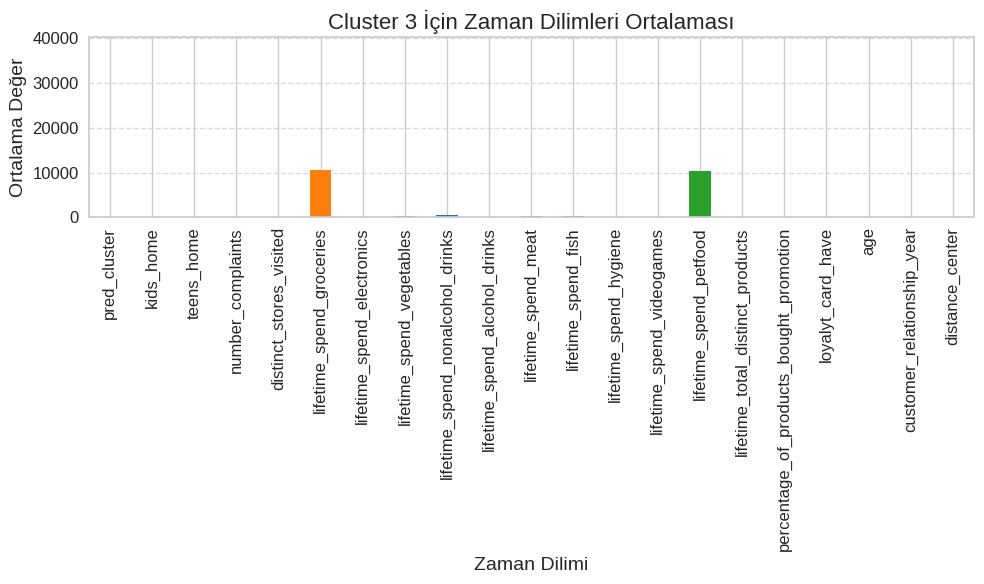

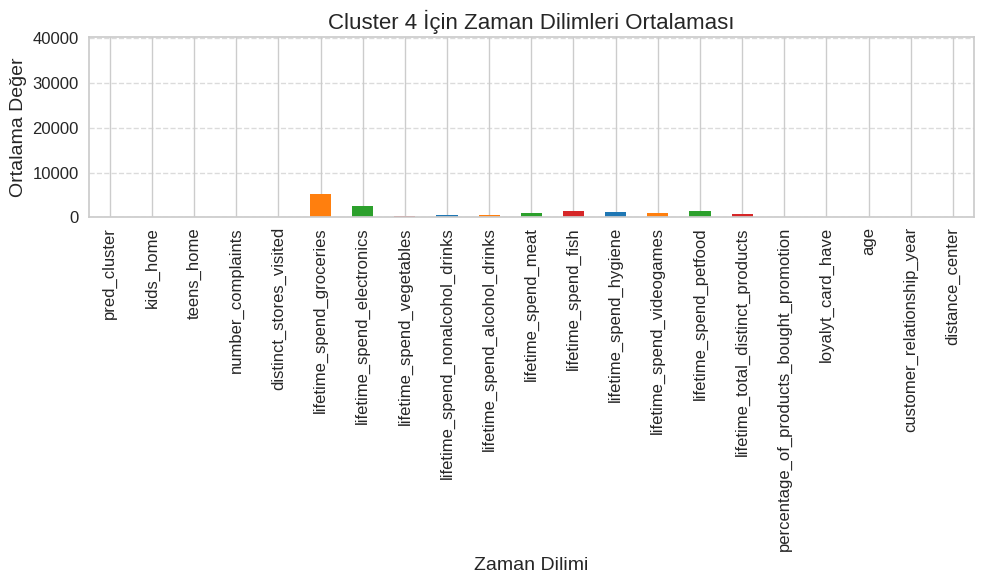

In [115]:
max_y = grouped.max().max()

# Her cluster için ayrı grafik oluştur
clusters = grouped.index

for cluster in clusters:
    cluster_data = grouped.loc[cluster]
    plt.figure(figsize=(10, 6))
    ax = cluster_data.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    plt.title(f'Cluster {cluster} İçin Zaman Dilimleri Ortalaması', fontsize=16)
    plt.xlabel('Zaman Dilimi', fontsize=14)
    plt.ylabel('Ortalama Değer', fontsize=14)
    plt.xticks(rotation=90, fontsize=12, ha='center')
    plt.yticks(fontsize=12)
    plt.ylim(0, max_y)  # Aynı y ekseni sınırlarını ayarla
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # x ekseni etiketlerini doğrudan sütunların altına yerleştir
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('center')

    plt.show()

<ipython-input-116-0280f808b3ef>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-116-0280f808b3ef>:13: UserWarning:


The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.

<ipython-input-116-0280f808b3ef>:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



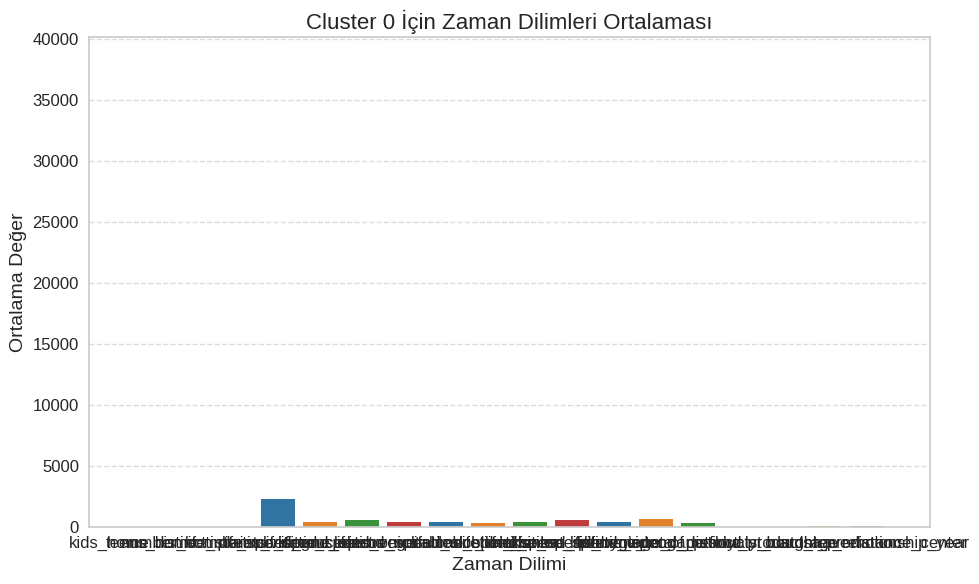

<ipython-input-116-0280f808b3ef>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-116-0280f808b3ef>:13: UserWarning:


The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.

<ipython-input-116-0280f808b3ef>:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



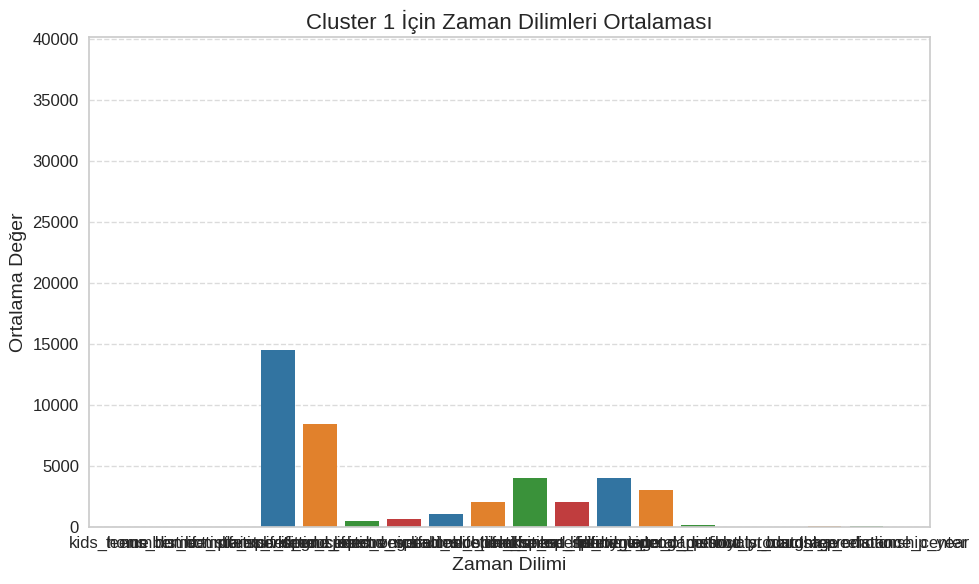

<ipython-input-116-0280f808b3ef>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-116-0280f808b3ef>:13: UserWarning:


The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.

<ipython-input-116-0280f808b3ef>:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



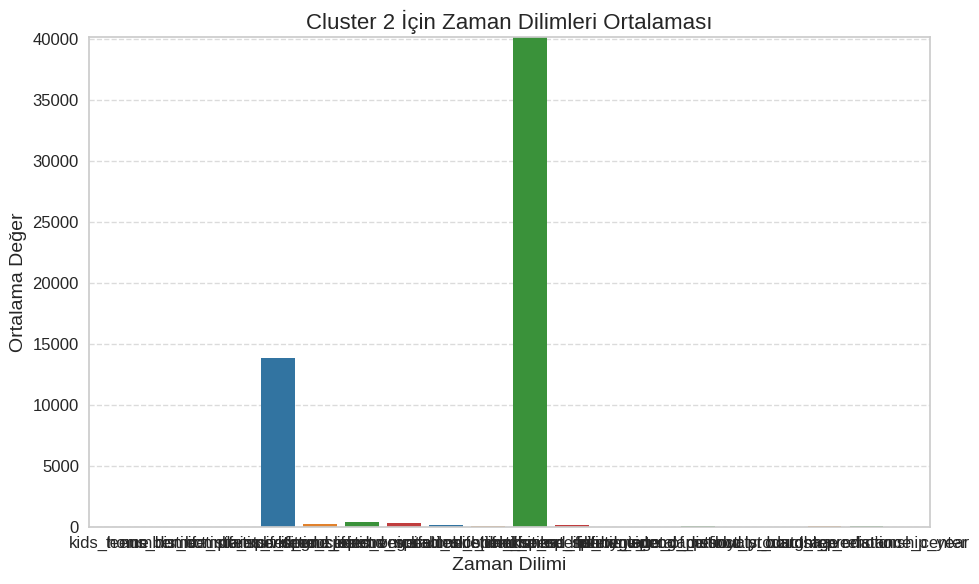

<ipython-input-116-0280f808b3ef>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-116-0280f808b3ef>:13: UserWarning:


The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.

<ipython-input-116-0280f808b3ef>:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



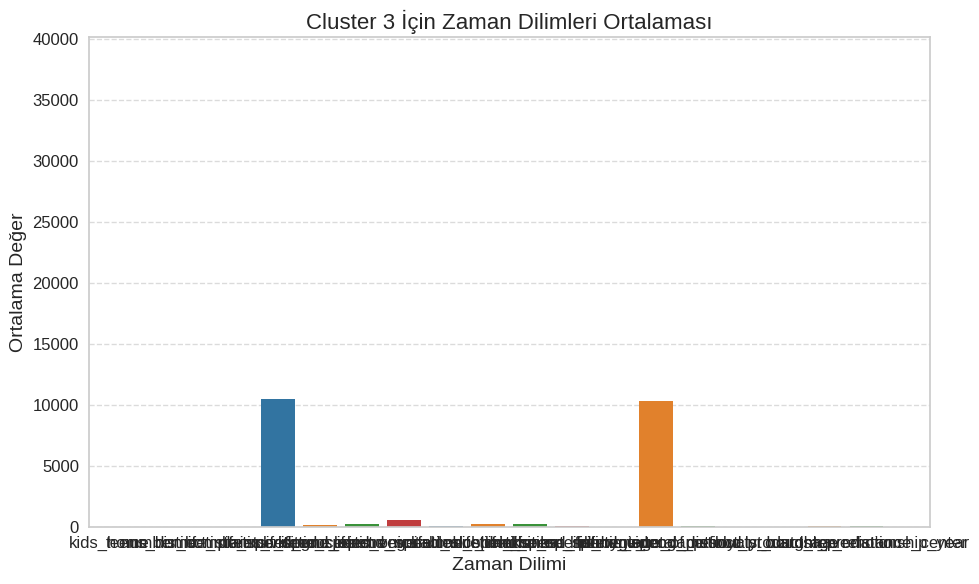

<ipython-input-116-0280f808b3ef>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-116-0280f808b3ef>:13: UserWarning:


The palette list has fewer values (4) than needed (20) and will cycle, which may produce an uninterpretable plot.

<ipython-input-116-0280f808b3ef>:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



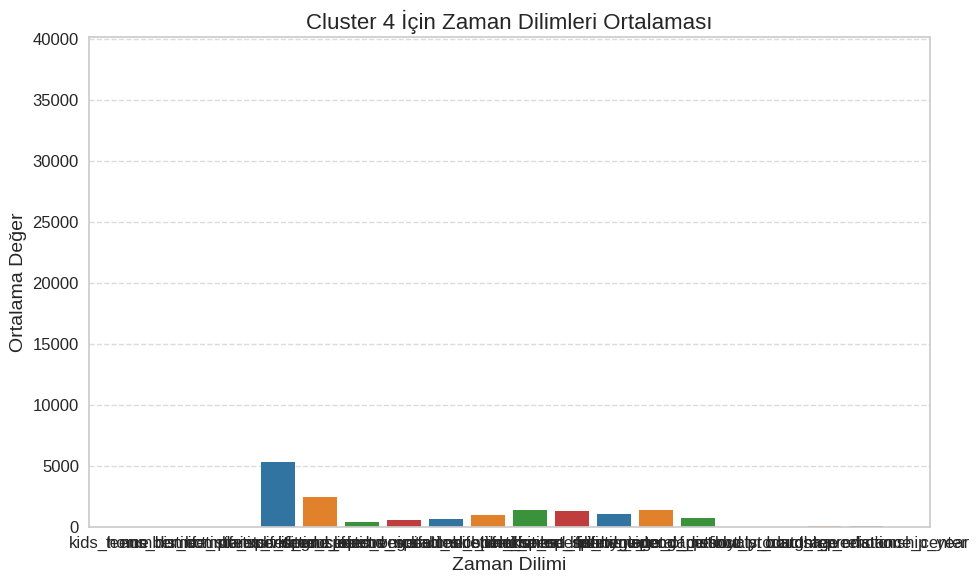

In [116]:
eğişken= df.drop(columns=["customer_gender_1","time_slot_early_morning","time_slot_evening","time_slot_morning","time_slot_night"])

grouped = değişken.groupby('pred_cluster').mean().reset_index()

max_y = grouped.drop(columns='pred_cluster').max().max()

# Her cluster için ayrı grafik oluştur
clusters = grouped['pred_cluster'].unique()

for cluster in clusters:
    cluster_data = grouped[grouped['pred_cluster'] == cluster].melt(id_vars='pred_cluster', var_name='Zaman Dilimi', value_name='Ortalama Değer')
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Zaman Dilimi', y='Ortalama Değer', data=cluster_data, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    ax.set_title(f'Cluster {cluster} İçin Zaman Dilimleri Ortalaması', fontsize=16)
    ax.set_xlabel('Zaman Dilimi', fontsize=14)
    ax.set_ylabel('Ortalama Değer', fontsize=14)
    ax.set_ylim(0, max_y)  # Aynı y ekseni sınırlarını ayarla
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [117]:
data

customer_id  customer_gender  customer_birthdate  kids_home  \
0            39634                1 1964-05-15 22:34:00        1.0   
1            43460                0 1988-03-26 23:06:00        1.0   
2            23937                0 1969-04-13 18:07:00        0.0   
3             2431                0 1941-06-15 03:26:00        0.0   
4            10090                1 2001-12-18 03:03:00        0.0   
...            ...              ...                 ...        ...   
43626        48487                0 1983-08-28 11:43:00        1.0   
43627        24856                0 1992-09-21 19:16:00        1.0   
43628        21373                0 1994-02-20 05:58:00        0.0   
43629        19527                0 1989-08-06 16:39:00        1.0   
43630         5120                1 1957-06-19 10:53:00        2.0   

       teens_home  number_complaints  distinct_stores_visited  \
0             1.0                1.0                      2.0   
1             0.0                1.0                      2.0   
2             1.0                1.0                      3.0   
3             0.0                0.0                      1.0   
4             0.0                0.0                      1.0   
...           ...                ...                      ...   
43626         1.0                0.0                      1.0   
43627         1.0                1.0                      1.0   
43628         0.0                0.0                      1.0   
43629         0.0                1.0                      1.0   
43630         0.0                2.0                      1.0   

       lifetime_spend_groceries  lifetime_spend_electronics  typical_hour  \
0                       18306.0                      7106.0          17.0   
1                        5015.0                      1334.0           8.0   
2                        3097.0                      4073.0          10.0   
3                       10825.0                       207.0          17.0   
4                         697.0                       570.0           NaN   
...                         ...                         ...           ...   
43626                    7189.0                      6293.0          17.0   
43627                   11238.0                     11490.0          12.0   
43628                    6059.0                       241.0          12.0   
43629                    3098.0                       425.0           6.0   
43630                    6869.0                      1554.0          10.0   

       lifetime_spend_vegetables  lifetime_spend_nonalcohol_drinks  \
0                          484.0                             604.0   
1                          344.0                             374.0   
2                          301.0                             852.0   
3                          153.0                             252.0   
4                            8.0                              33.0   
...                          ...                               ...   
43626                      678.0                             741.0   
43627                      602.0                             557.0   
43628                      289.0                             420.0   
43629                      866.0                             369.0   
43630                      268.0                             659.0   

       lifetime_spend_alcohol_drinks  lifetime_spend_meat  \
0                              943.0               2226.0   
1                             1217.0               1068.0   
2                             1731.0                446.0   
3                               60.0                285.0   
4                             2833.0                 54.0   
...                              ...                  ...   
43626                          639.0               1569.0   
43627                         1503.0               2610.0   
43628                           43.0                331.0   
43629    

In [118]:
df["customer_id"]=data["customer_id"]

In [120]:
sub=df[["customer_id","pred_cluster"]]

In [122]:
sub.to_csv("sub.csv",index=False)

In [123]:
from google.colab import files

files.download('sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>